# Advanced Regression
## House price assignment
### Probelm Statement - Part1:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. Data analyst is required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

 - Which variables are significant in predicting the price of a house, and
 - How well those variables describe the price of a house 



Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

A data analyst is required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.






### Step 1: Reading, Understanding and data quality check

In [1]:
# Supress warnings and import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_csv(r"E:\Rajeev\IIITB\ML&AI\Machine_Learning_2\Advanced_Regression\Main_Assignment\train.csv", encoding = 'ISO-8859-1')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.shape

(1460, 81)

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# storing unique value in a variable 
arr = house.Id.unique()
# Number of unique values in this array
len(arr)

1460

Number of unique Id's are same as number of rows, so there is no any duplicate rows.

In [6]:
house.isnull().any().head(41)

Id              False
MSSubClass      False
MSZoning        False
LotFrontage      True
LotArea         False
Street          False
Alley            True
LotShape        False
LandContour     False
Utilities       False
LotConfig       False
LandSlope       False
Neighborhood    False
Condition1      False
Condition2      False
BldgType        False
HouseStyle      False
OverallQual     False
OverallCond     False
YearBuilt       False
YearRemodAdd    False
RoofStyle       False
RoofMatl        False
Exterior1st     False
Exterior2nd     False
MasVnrType       True
MasVnrArea       True
ExterQual       False
ExterCond       False
Foundation      False
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinSF1      False
BsmtFinType2     True
BsmtFinSF2      False
BsmtUnfSF       False
TotalBsmtSF     False
Heating         False
HeatingQC       False
dtype: bool

Here there are two types of missing values, type-1 is normal missing values where data not available and type-2 is where missing values having some meaning (i.e. any particular column is not applicable for any particular row, so intentionally left blank). Type-2 missing values in different columns can be imputed by dummy value as '0' (zero).

In [7]:
house.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [8]:
# For column Alley, type-2 missing treatment

Alley_1 = pd.get_dummies(house['Alley'], drop_first = False, prefix = 'Alley')
Alley_1.head(2)

,Alley_Grvl,Alley_Pave
0,0,0
1,0,0


In [9]:
# Add the results to the original house dataframe

house = pd.concat([house, Alley_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_Pave
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,0,0


In [10]:
# Drop 'Alley' as we have created the dummies for it

house.drop(['Alley'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_Pave
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,0,0


In [11]:
house.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [12]:
# For column PoolQC, type-2 missing treatment

PoolQC_1 = pd.get_dummies(house['PoolQC'], drop_first = False, prefix = 'PoolQC')
PoolQC_1.head(2)

,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd
0,0,0,0
1,0,0,0


In [13]:
# Add the results to the original house dataframe

house = pd.concat([house, PoolQC_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_Pave,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,208500,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,181500,0,0,0,0,0


In [14]:
# Drop 'PoolQC' as we have created the dummies for it

house.drop(['PoolQC'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_Grvl,Alley_Pave,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,208500,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,181500,0,0,0,0,0


In [15]:
house.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [16]:
# For column Fence, type-2 missing treatment

Fence_1 = pd.get_dummies(house['Fence'], drop_first = False, prefix = 'Fence')
Fence_1.head(2)

,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw
0,0,0,0,0
1,0,0,0,0


In [17]:
# Add the results to the original house dataframe

house = pd.concat([house, Fence_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SalePrice,Alley_Grvl,Alley_Pave,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,208500,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,181500,0,0,0,0,0,0,0,0,0


In [18]:
# Drop 'Fence' as we have created the dummies for it

house.drop(['Fence'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SalePrice,Alley_Grvl,Alley_Pave,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,208500,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,181500,0,0,0,0,0,0,0,0,0


In [19]:
house.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [20]:
# For column MiscFeature, type-2 missing treatment

MiscFeature_1 = pd.get_dummies(house['MiscFeature'], drop_first = False, prefix = 'MiscFeature')
MiscFeature_1.head(2)

,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,0,0,0,0
1,0,0,0,0


In [21]:
# Add the results to the original house dataframe

house = pd.concat([house, MiscFeature_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Drop 'MiscFeature' as we have created the dummies for it

house.drop(['MiscFeature'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# summing up the missing values (column-wise) and finding its percentage
round(house.isnull().sum()/len(house.index)*100,2).head(50)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage     17.74
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea 

No any bigger missing values (like more than 80% etc.). Now the remainings missing values will be treated.

In [24]:
house.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

There are lot of variations between min, 25th till 75th percentiles to finally max values, so imputing with these any of the values will be risky.

In [25]:
# imputing NaN with mode in column LotFrontage
house['LotFrontage'].fillna(house['LotFrontage'].mode()[0], inplace=True)

In [26]:
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
7,8,60,RL,60.0,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,1,0
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0


In [27]:
house.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

Here MasVnrType as 'None' indicates masonary is not used by these rows\houses.Such rows can be treated as with type-2 missing values.

In [28]:
house.MasVnrType.isnull().sum()

8

Here 8 number of rows in this column 'MasVnrType' having type-1 missing values where data is not available. Such rows can be filled with 'None' as MasVnrType as it is the most frequent occurring type.  

In [29]:
# Changing all the NA's and None to NaN
house['MasVnrType'] = house['MasVnrType'].replace('NA', np.NaN)
house['MasVnrType'] = house['MasVnrType'].replace('None', np.NaN) 

In [30]:
house[['MasVnrType']]

,MasVnrType
0,BrkFace
1,NaN
2,BrkFace
3,NaN
4,BrkFace
...,...
1455,NaN
1456,Stone
1457,NaN
1458,NaN


In [31]:
# Will convert MasVnrType as dummy variables
MasVnrType_1 = pd.get_dummies(house['MasVnrType'], drop_first = False, prefix = 'MasVnrType')
MasVnrType_1.head(2)

,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone
0,0,1,0
1,0,0,0


In [32]:
# Add the results to the original house dataframe

house = pd.concat([house, MasVnrType_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Drop 'MasVnrType' as we have created the dummies for it

house.drop(['MasVnrType'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0


In [34]:
house.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [35]:
house.MasVnrArea.value_counts().sort_values(ascending = False)

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
603.0      1
748.0      1
459.0      1
506.0      1
67.0       1
Name: MasVnrArea, Length: 327, dtype: int64

Text(0.5, 0, 'MasVnrArea')

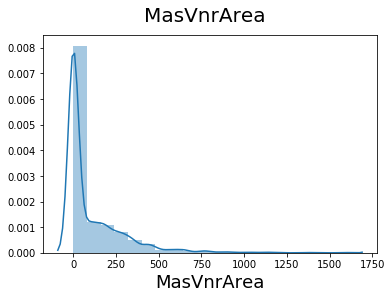

In [36]:
# Plot the histogram of the column MasVnrArea to check its distribution
fig = plt.figure()
sns.distplot(house['MasVnrArea'], bins = 20)
fig.suptitle('MasVnrArea', fontsize = 20)                  # Plot heading 
plt.xlabel('MasVnrArea', fontsize = 18)                         # X-label

Here looking the distribution, it can be seen that frequency at '0' is very high and it is nearly 60% of the entrire column data. But still it can't be considered as a hgihly skewed distribution, so will retain this column.

In [37]:
house.MasVnrArea.isnull().sum()

8

In [38]:
# imputing NA with mode in column MasVnrArea
house['MasVnrArea'].fillna(house['MasVnrArea'].mode()[0], inplace=True)

In [39]:
house.BsmtQual.describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [40]:
house.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [41]:
house.BsmtQual.isnull().sum()

37

These are type-2 missing values for the houses which don't have any basement. Will convert this column with dummy variables, so  rows with such missing values can be consdered as '0'. 

In [42]:
# For column BsmtQual, type-2 missing treatment

BsmtQual_1 = pd.get_dummies(house['BsmtQual'], drop_first = False, prefix = 'BsmtQual')
BsmtQual_1.head(2)

,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,0,0,1,0
1,0,0,1,0


In [43]:
# Add the results to the original house dataframe

house = pd.concat([house, BsmtQual_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,1,0


In [44]:
# Drop 'BsmtQual' as we have created the dummies for it

house.drop(['BsmtQual'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,1,0


In [45]:
house.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [46]:
house.BsmtCond.isnull().sum()

37

90% of the rows having 'TA' as BsmtCond, hence indicating most frequent occurring type. Will impute missing rows with 'TA'.

In [47]:
# imputing NA with mode in column BsmtCond
house['BsmtCond'].fillna(house['BsmtCond'].mode()[0], inplace=True)

In [48]:
house.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

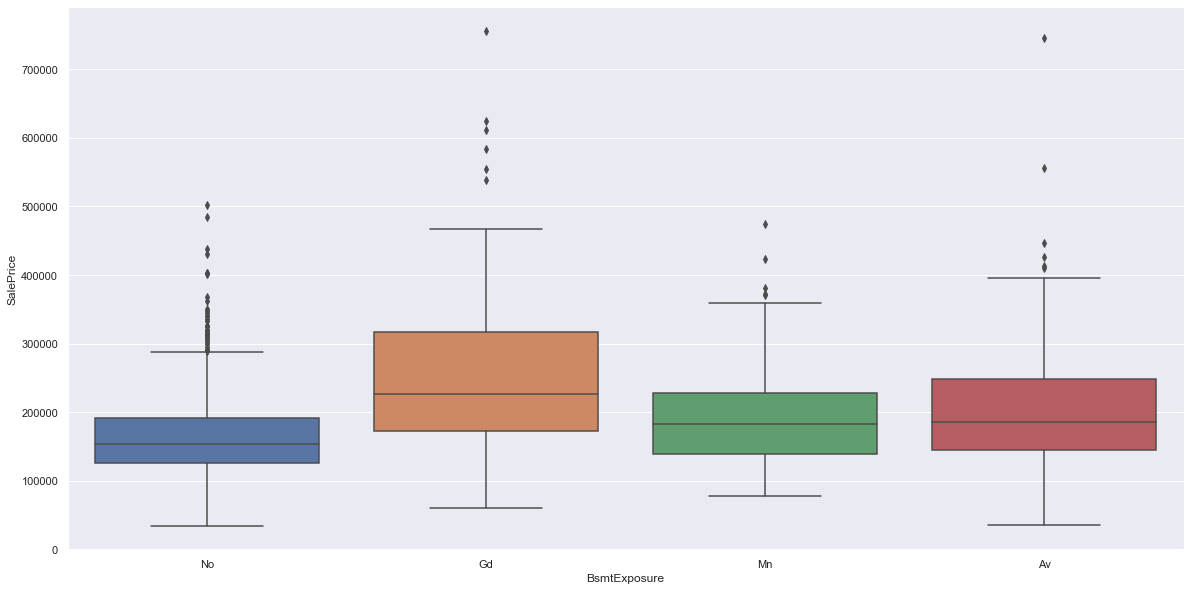

In [49]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = house)
plt.show()

Here BsmtExposure as type 'Gd' having median and maximum values are biggest among all. 

In [50]:
house.BsmtExposure.isnull().sum()

38

These are type-2 missing values for the houses which don't have any basement. Will convert this column with dummy variables, so  rows with such missing values can be consdered as '0'. 

In [51]:
# For column BsmtExposure, type-2 missing treatment

BsmtExposure_1 = pd.get_dummies(house['BsmtExposure'], drop_first = False, prefix = 'BsmtExposure')
BsmtExposure_1.head(2)

,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No
0,0,0,0,1
1,0,1,0,0


In [52]:
# Add the results to the original house dataframe

house = pd.concat([house, BsmtExposure_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MasVnrType_BrkFace,MasVnrType_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,0,1,0,0,0,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,1,0,0


In [53]:
# Drop 'BsmtExposure' as we have created the dummies for it

house.drop(['BsmtExposure'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MasVnrType_BrkFace,MasVnrType_Stone,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,0,1,0,0,0,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,1,0,0


In [54]:
house.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [55]:
house.BsmtFinType1.isnull().sum()

37

In [56]:
# For column BsmtFinType1 missing values in the rows belong to the houses which don't have any basement, so type-2 missing treatment 

BsmtFinType1_1 = pd.get_dummies(house['BsmtFinType1'], drop_first = False, prefix = 'BsmtFinType1')
BsmtFinType1_1.head(2)

,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf
0,0,0,1,0,0,0
1,1,0,0,0,0,0


In [57]:
# Add the results to the original house dataframe

house = pd.concat([house, BsmtFinType1_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,1,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,1,0,0,1,0,0,0,0,0


In [58]:
# Drop 'BsmtFinType1' as we have created the dummies for it

house.drop(['BsmtFinType1'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,1,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,1,0,0,1,0,0,0,0,0


In [59]:
house.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [60]:
house.BsmtFinType2.isnull().sum()

38

Will treat here the missing values with mode value.

In [61]:
# imputing NA with mode in column Electrical
house['BsmtFinType2'].fillna(house['BsmtFinType2'].mode()[0], inplace=True)

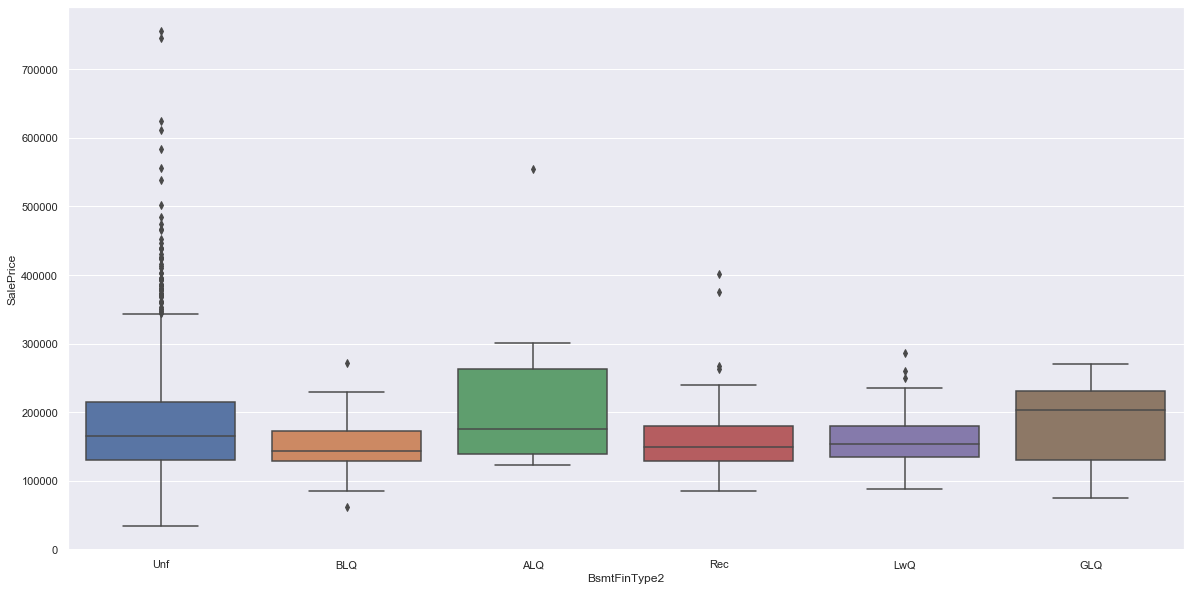

In [62]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = house)
plt.show()

In [63]:
# For column BsmtFinType2 converting to dummy variables and retaining only type 'Unf' as it is the most 
#frequent occurring value for the houses.  

BsmtFinType2_1 = pd.get_dummies(house['BsmtFinType2'], drop_first = False, prefix = 'BsmtFinType2')
BsmtFinType2_1.drop(['BsmtFinType2_BLQ', 'BsmtFinType2_ALQ', 'BsmtFinType2_Rec', 'BsmtFinType2_LwQ', 'BsmtFinType2_GLQ' ], axis = 1, inplace = True)
BsmtFinType2_1.head(2)

,BsmtFinType2_Unf
0,1
1,1


In [64]:
# Add the results to the original house dataframe

house = pd.concat([house, BsmtFinType2_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,1,0,0,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,1,0,0,1,0,0,0,0,0,1


In [65]:
# Drop 'BsmtFinType2' 

house.drop(['BsmtFinType2'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,1,0,0,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,1,0,0,1,0,0,0,0,0,1


In [66]:
house.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [67]:
house.Electrical.isnull().sum()

1

In [68]:
# imputing NA with mode in column Electrical
house['Electrical'].fillna(house['Electrical'].mode()[0], inplace=True)

In [69]:
house.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [70]:
house.FireplaceQu.isnull().sum()

690

In [71]:
# For column FireplaceQu missing values in the rows belong to the houses which don't have any fireplace 
# so type-2 missing treatment 

FireplaceQu_1 = pd.get_dummies(house['FireplaceQu'], drop_first = False, prefix = 'FireplaceQu')
FireplaceQu_1.head(2)

,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA
0,0,0,0,0,0
1,0,0,0,0,1


In [72]:
# Add the results to the original house dataframe

house = pd.concat([house, FireplaceQu_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,0,1,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,0,1


In [73]:
# Drop 'FireplaceQu' as we have created the dummies for it

house.drop(['FireplaceQu'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,0,1,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,0,1


In [74]:
house.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [75]:
house.GarageType.isnull().sum()

81

In [76]:
# For column GarageType missing values in the rows belong to the houses which don't have any fireplace, 
# so type-2 missing treatment 

GarageType_1 = pd.get_dummies(house['GarageType'], drop_first = False, prefix = 'GarageType')
GarageType_1.head(2)

,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,0,1,0,0,0,0
1,0,1,0,0,0,0


In [77]:
# Add the results to the original house dataframe

house = pd.concat([house, GarageType_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,1,0,1,0,0,0,0


In [78]:
# Drop 'GarageType' as we have created the dummies for it

house.drop(['GarageType'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,1,0,1,0,0,0,0


In [79]:
house.GarageYrBlt.value_counts().sort_values(ascending = False).head(5)

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
Name: GarageYrBlt, dtype: int64

In [80]:
house.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [81]:
house.GarageYrBlt.isnull().sum()

81

It can be seen here that there is difference between min to 50th percentile till max, so imputing the missing rows here with any these values will give biased prediction. So I will drop the missing rows in the column GarageYrBlt. 

In [82]:
# removing NaNs in column GarageYrBlt
house = house[~np.isnan(house['GarageYrBlt'])]

In [83]:
house.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [84]:
house.GarageFinish.isnull().sum()

0

In [85]:
# For column GarageFinish converting to dummy variables. 

GarageFinish_1 = pd.get_dummies(house['GarageFinish'], drop_first = False, prefix = 'GarageFinish')
GarageFinish_1.head(2)

,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,0,1,0
1,0,1,0


In [86]:
# Add the results to the original house dataframe

house = pd.concat([house, GarageFinish_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,1,0,1,0,0,0,0,0,1,0


In [87]:
# Drop 'GarageFinish' as we have created the dummies for it

house.drop(['GarageFinish'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,1,0,1,0,0,0,0,0,1,0


In [88]:
house.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

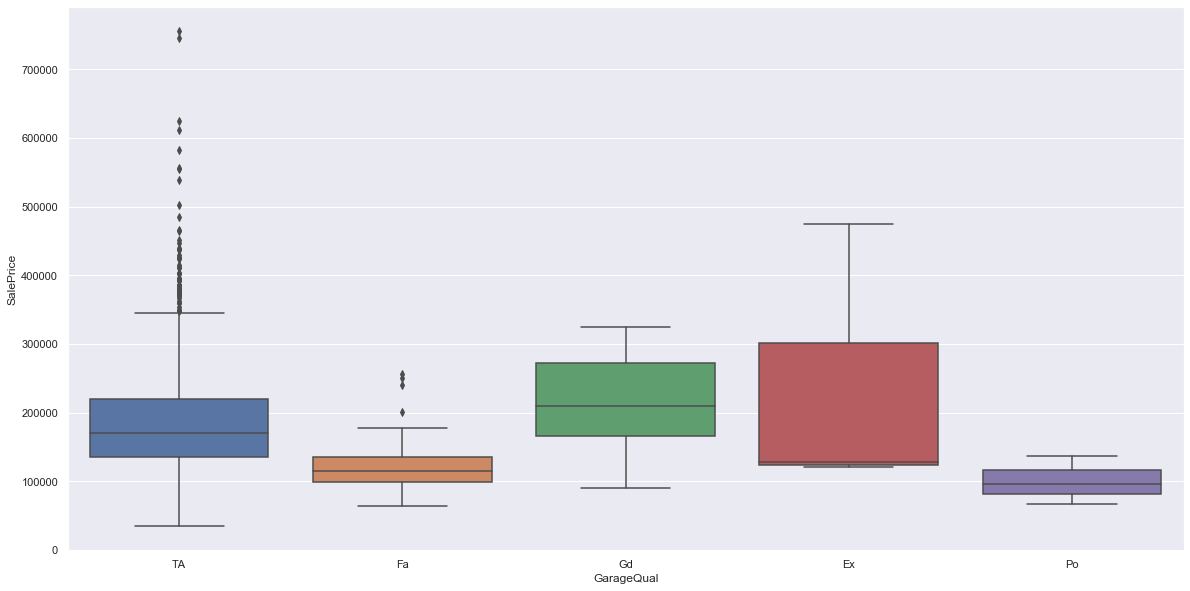

In [89]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = house)
plt.show()

In [90]:
# For column GarageQual converting to dummy variables and retaining only types 'TA', 'Fa' and 'Gd'

GarageQual_1 = pd.get_dummies(house['GarageQual'], drop_first = False, prefix = 'GarageQual')
GarageQual_1.drop(['GarageQual_Ex', 'GarageQual_Po'], axis = 1, inplace = True)
GarageQual_1.head(2)

,GarageQual_Fa,GarageQual_Gd,GarageQual_TA
0,0,0,1
1,0,0,1


In [91]:
# Add the results to the original house dataframe

house = pd.concat([house, GarageQual_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_TA
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,0,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,1,0,0,0,1


In [92]:
# Dropping 'GarageQual'  

house.drop(['GarageQual'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_TA
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,0,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,1,0,0,0,1


In [93]:
house.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

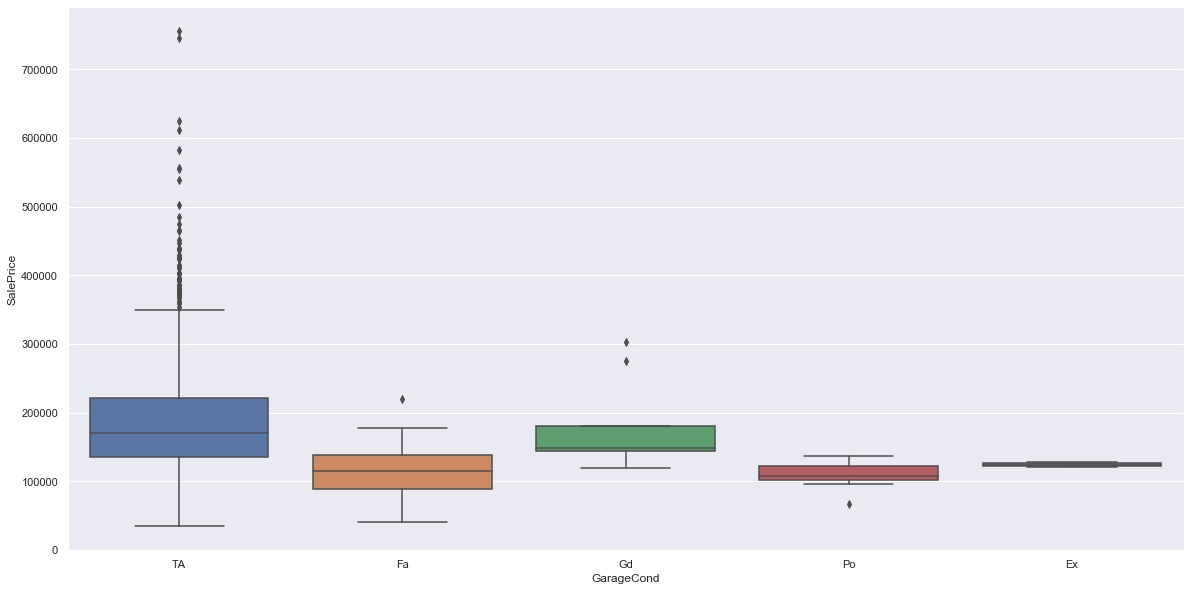

In [94]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = house)
plt.show()

In [95]:
# For column GarageCond converting to dummy variables and retaining only types 'TA', 'Fa' and 'Gd'

GarageCond_1 = pd.get_dummies(house['GarageCond'], drop_first = False, prefix = 'GarageCond')
GarageCond_1.drop(['GarageCond_Gd', 'GarageCond_Po', 'GarageCond_Ex'], axis = 1, inplace = True)
GarageCond_1.head(2)

,GarageCond_Fa,GarageCond_TA
0,0,1
1,0,1


In [96]:
# Add the results to the original house dataframe

house = pd.concat([house, GarageCond_1], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageCond_Fa,GarageCond_TA
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,1,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,1,0,0,0,1,0,1


In [97]:
# Dropping'GarageCond' 

house.drop(['GarageCond'], axis = 1, inplace = True)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageCond_Fa,GarageCond_TA
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,1,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,1,0,0,0,1,0,1


In [98]:
house.shape

(1379, 117)

In [99]:
# summing up the missing values (column-wise) and finding its percentage
round(house.isnull().sum()/len(house.index)*100,2).tail(60)

EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                0.0
YrSold                0.0
SaleType              0.0
SaleCondition         0.0
SalePrice             0.0
Alley_Grvl            0.0
Alley_Pave            0.0
PoolQC_Ex             0.0
PoolQC_Fa             0.0
PoolQC_Gd             0.0
Fence_GdPrv           0.0
Fence_GdWo            0.0
Fence_MnPrv           0.0
Fence_MnWw            0.0
MiscFeature_Gar2      0.0
MiscFeature_Othr      0.0
MiscFeature_Shed      0.0
MiscFeature_TenC      0.0
MasVnrType_BrkCmn     0.0
MasVnrType_BrkFace    0.0
MasVnrType_Stone      0.0
BsmtQual_Ex           0.0
BsmtQual_Fa           0.0
BsmtQual_Gd           0.0
BsmtQual_TA           0.0
BsmtExposure_Av       0.0
BsmtExposure_Gd       0.0
BsmtExposure_Mn       0.0
BsmtExposure_No       0.0
BsmtFinType1_ALQ      0.0
BsmtFinType1_BLQ      0.0
BsmtFinType1_GLQ      0.0
BsmtFinType1_LwQ      0.0
BsmtFinType1

Data cleaning steps are completed now considering the quality checks norms. As stated above, during this step for many columns categorical variables have been converted to dummy variables for type-2 missing values; ideally this is the partial step falling under data preparation. 

## Step-2: Preparing data for modelling

In this step remainings all the categorical variables will be converted to dummy variables.

In [100]:
house.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageCond_Fa,GarageCond_TA
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,1,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,1,0,0,0,1,0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,1,0,1


In [101]:
# Will drop column 'Id'
house.drop(['Id'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageCond_Fa,GarageCond_TA
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,1,0,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,0,0,1,0,1


In [102]:
house.MSZoning.value_counts()

RL         1101
RM          193
FV           65
RH           12
C (all)       8
Name: MSZoning, dtype: int64

In [103]:
# For column MSZoning converting to dummy variables. 

MSZoning_1 = pd.get_dummies(house['MSZoning'], drop_first = True, prefix = 'MSZoning')
MSZoning_1.head(2)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0


In [104]:
# Add the results to the original house dataframe

house = pd.concat([house, MSZoning_1], axis = 1)
house.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageCond_Fa,GarageCond_TA,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,1,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,1,0,0,1,0


In [105]:
# Will drop column 'MSZoning'
house.drop(['MSZoning'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageCond_Fa,GarageCond_TA,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,1,0,1,0,0,1,0
1,20,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,1,0,1,0,0,1,0


In [106]:
house.Street.value_counts()

Pave    1374
Grvl       5
Name: Street, dtype: int64

In [107]:
# For column Street converting to dummy variables. 

Street_1 = pd.get_dummies(house['Street'], drop_first = True, prefix = 'Street')
Street_1.head(2)

,Street_Pave
0,1
1,1


In [108]:
# Add the results to the original house dataframe

house = pd.concat([house, Street_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageCond_Fa,GarageCond_TA,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave
0,60,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,1,0,1,0,0,1,0,1
1,20,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,1,0,1,0,0,1,0,1


In [109]:
# Will drop column 'Street'
house.drop(['Street'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageCond_Fa,GarageCond_TA,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave
0,60,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,1,0,1,0,0,1,0,1
1,20,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,1,0,1,0,0,1,0,1


In [110]:
house.LotShape.value_counts()

Reg    861
IR1    467
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [111]:
# For column LotShape converting to dummy variables. 

LotShape_1 = pd.get_dummies(house['LotShape'], drop_first = False, prefix = 'LotShape')
LotShape_1.drop(['LotShape_IR3'], axis = 1, inplace = True)
LotShape_1.head(2)

,LotShape_IR1,LotShape_IR2,LotShape_Reg
0,0,0,1
1,0,0,1


In [112]:
# Add the results to the original house dataframe

house = pd.concat([house, LotShape_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond_Fa,GarageCond_TA,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_Reg
0,60,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,1,0,0,1,0,1,0,0,1
1,20,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,1,0,0,1,0,1,0,0,1


In [113]:
# Will drop column 'LotShape'
house.drop(['LotShape'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageCond_Fa,GarageCond_TA,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_Reg
0,60,65.0,8450,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,1,0,0,1,0,1,0,0,1
1,20,80.0,9600,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,0,1,0,0,1,0,1,0,0,1


In [114]:
house.LandContour.value_counts()

Lvl    1244
Bnk      54
HLS      48
Low      33
Name: LandContour, dtype: int64

In [115]:
# For column LandContour converting to dummy variables. 

LandContour_1 = pd.get_dummies(house['LandContour'], drop_first = False, prefix = 'LandContour')
LandContour_1.drop(['LandContour_Low'], axis = 1, inplace = True)
LandContour_1.head(2)

,LandContour_Bnk,LandContour_HLS,LandContour_Lvl
0,0,0,1
1,0,0,1


In [116]:
# Add the results to the original house dataframe

house = pd.concat([house, LandContour_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl
0,60,65.0,8450,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,1,0,1,0,0,1,0,0,1
1,20,80.0,9600,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,0,1,0,1,0,0,1,0,0,1


In [117]:
# Will drop column 'LandContour'
house.drop(['LandContour'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl
0,60,65.0,8450,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,1,0,1,0,0,1,0,0,1
1,20,80.0,9600,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,0,1,0,1,0,0,1,0,0,1


In [118]:
# For column Utilities converting to dummy variables. 

Utilities_1 = pd.get_dummies(house['Utilities'], drop_first = False, prefix = 'Utilities')
Utilities_1.drop(['Utilities_NoSeWa'], axis = 1, inplace = True)
Utilities_1.head(2)

,Utilities_AllPub
0,1
1,1


In [119]:
# Add the results to the original house dataframe

house = pd.concat([house, Utilities_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,Utilities_AllPub
0,60,65.0,8450,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,1,0,1,0,0,1,0,0,1,1
1,20,80.0,9600,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,1,0,1,0,0,1,0,0,1,1


In [120]:
# Will drop column 'Utilities'
house.drop(['Utilities'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,Utilities_AllPub
0,60,65.0,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,1,0,1,0,0,1,0,0,1,1
1,20,80.0,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,1,0,1,0,0,1,0,0,1,1


In [121]:
house.LotConfig.value_counts()

Inside     988
Corner     250
CulDSac     93
FR2         44
FR3          4
Name: LotConfig, dtype: int64

In [122]:
# For column LotConfig converting to dummy variables. 

LotConfig_1 = pd.get_dummies(house['LotConfig'], drop_first = False, prefix = 'LotConfig')
LotConfig_1.drop(['LotConfig_FR3'], axis = 1, inplace = True)
LotConfig_1.head(2)

,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside
0,0,0,0,1
1,0,0,1,0


In [123]:
# Add the results to the original house dataframe

house = pd.concat([house, LotConfig_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside
0,60,65.0,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,0,1,0,0,1,1,0,0,0,1
1,20,80.0,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,0,1,0,0,1,1,0,0,1,0


In [124]:
# Will drop column 'LotConfig'
house.drop(['LotConfig'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside
0,60,65.0,8450,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,1,0,0,1,1,0,0,0,1
1,20,80.0,9600,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,0,1,0,0,1,1,0,0,1,0


In [125]:
house.LandSlope.value_counts()

Gtl    1306
Mod      61
Sev      12
Name: LandSlope, dtype: int64

In [126]:
# For column LandSlope converting to dummy variables. 

LandSlope_1 = pd.get_dummies(house['LandSlope'], drop_first = False, prefix = 'LandSlope')
LandSlope_1.drop(['LandSlope_Sev'], axis = 1, inplace = True)
LandSlope_1.head(2)

,LandSlope_Gtl,LandSlope_Mod
0,1,0
1,1,0


In [127]:
# Add the results to the original house dataframe

house = pd.concat([house, LandSlope_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod
0,60,65.0,8450,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,0,1,1,0,0,0,1,1,0
1,20,80.0,9600,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,0,0,1,1,0,0,1,0,1,0


In [128]:
# Will drop column 'LandSlope'
house.drop(['LandSlope'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,...,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod
0,60,65.0,8450,CollgCr,Norm,Norm,1Fam,2Story,7,5,...,0,0,1,1,0,0,0,1,1,0
1,20,80.0,9600,Veenker,Feedr,Norm,1Fam,1Story,6,8,...,0,0,1,1,0,0,1,0,1,0


In [129]:
house.Neighborhood.value_counts()

NAmes      219
CollgCr    148
OldTown    101
Somerst     86
Gilbert     79
Edwards     78
NridgHt     77
NWAmes      73
Sawyer      71
SawyerW     58
Crawfor     51
BrkSide     48
Mitchel     44
NoRidge     41
Timber      38
IDOTRR      29
ClearCr     27
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

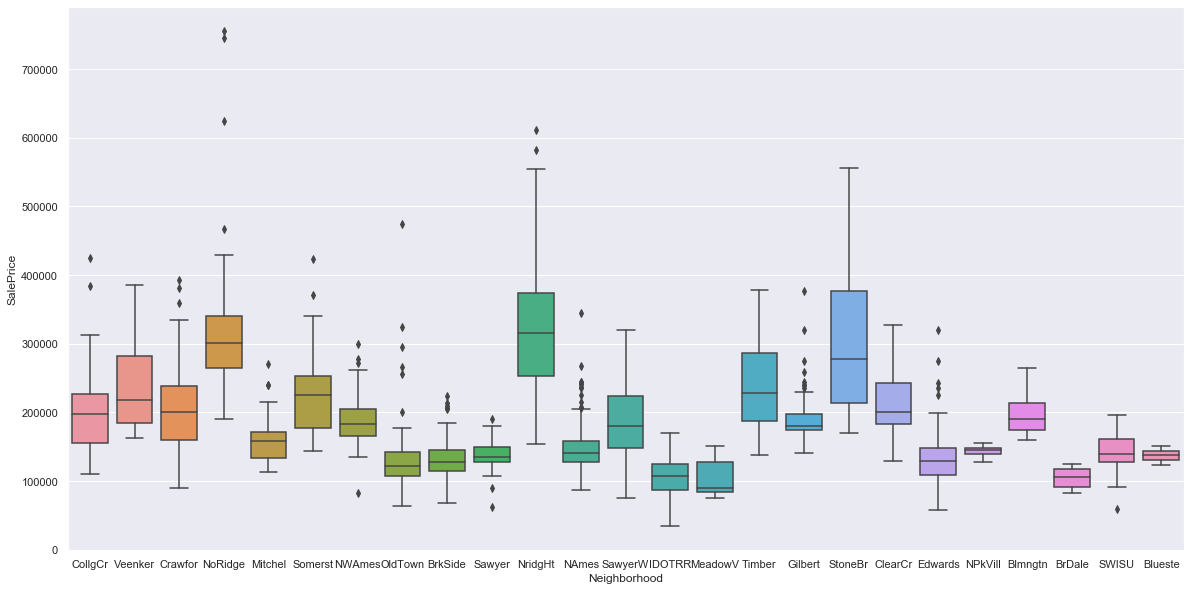

In [130]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = house)
plt.show()

Neighborhood of a property is always its USP, from above box plot it can be seen that for some of the locations median and maximum value of the property is very high. Considering all the locations will add many dummy variables in the model, so intuitively will eliminate few locations where medians and maximum are small (and lesser than 200000) and finally will select few locations. I will select locations like CollgCr, Veenker, Crawfor, NoRidge, Somerst, NWAmes, NridgHt, SawyerW, Timber, Gilbert, StoneBr, ClearCr, Blmngtn.       

In [131]:
# For column Neighborhood converting to dummy variables. 

Neighborhood_1 = pd.get_dummies(house['Neighborhood'], drop_first = False, prefix = 'Neighborhood')
Neighborhood_1.drop(['Neighborhood_Mitchel', 'Neighborhood_OldTown', 'Neighborhood_BrkSide', 'Neighborhood_Sawyer','Neighborhood_NAmes','Neighborhood_IDOTRR','Neighborhood_MeadowV','Neighborhood_Edwards','Neighborhood_NPkVill','Neighborhood_BrDale','Neighborhood_SWISU','Neighborhood_Blueste'], axis = 1, inplace = True)
Neighborhood_1.head(2)

,Neighborhood_Blmngtn,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [132]:
# Add the results to the original house dataframe

house = pd.concat([house, Neighborhood_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,...,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,65.0,8450,CollgCr,Norm,Norm,1Fam,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,Veenker,Feedr,Norm,1Fam,1Story,6,8,...,0,0,0,0,0,0,0,0,0,1


In [133]:
# Will drop column 'Neighborhood'
house.drop(['Neighborhood'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,65.0,8450,Norm,Norm,1Fam,2Story,7,5,2003,...,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,Feedr,Norm,1Fam,1Story,6,8,1976,...,0,0,0,0,0,0,0,0,0,1


In [134]:
house.Condition1.value_counts()

Norm      1195
Feedr       69
Artery      44
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [135]:
# For column Condition1 converting to dummy variables. 

Condition1_1 = pd.get_dummies(house['Condition1'], drop_first = False, prefix = 'Condition1')
Condition1_1.head(2)

,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0


In [136]:
# Add the results to the original house dataframe

house = pd.concat([house, Condition1_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,60,65.0,8450,Norm,Norm,1Fam,2Story,7,5,2003,...,0,0,0,1,0,0,0,0,0,0
1,20,80.0,9600,Feedr,Norm,1Fam,1Story,6,8,1976,...,1,0,1,0,0,0,0,0,0,0


In [137]:
# Will drop column 'Condition1'
house.drop(['Condition1'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,60,65.0,8450,Norm,1Fam,2Story,7,5,2003,2003,...,0,0,0,1,0,0,0,0,0,0
1,20,80.0,9600,Norm,1Fam,1Story,6,8,1976,1976,...,1,0,1,0,0,0,0,0,0,0


In [138]:
house.Condition2.value_counts()

Norm      1365
Feedr        5
RRNn         2
PosN         2
Artery       2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

Will remove the Condition2 as presence of this column doesn't seem to be so meaningful when already the column Condition1 is present. This is to control the number of independent variables. 

In [139]:
# Will drop column 'Condition2'
house.drop(['Condition2'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,60,65.0,8450,1Fam,2Story,7,5,2003,2003,Gable,...,0,0,0,1,0,0,0,0,0,0
1,20,80.0,9600,1Fam,1Story,6,8,1976,1976,Gable,...,1,0,1,0,0,0,0,0,0,0


In [140]:
house.BldgType.value_counts()

1Fam      1166
TwnhsE     113
Duplex      40
Twnhs       38
2fmCon      22
Name: BldgType, dtype: int64

In [141]:
# For column BldgType converting to dummy variables. 

BldgType_1 = pd.get_dummies(house['BldgType'], drop_first = False, prefix = 'BldgType')
BldgType_1.head(2)

,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,1,0,0,0,0
1,1,0,0,0,0


In [142]:
# Add the results to the original house dataframe

house = pd.concat([house, BldgType_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,60,65.0,8450,1Fam,2Story,7,5,2003,2003,Gable,...,0,0,0,0,0,1,0,0,0,0
1,20,80.0,9600,1Fam,1Story,6,8,1976,1976,Gable,...,0,0,0,0,0,1,0,0,0,0


In [143]:
# Will drop column 'BldgType'
house.drop(['BldgType'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,60,65.0,8450,2Story,7,5,2003,2003,Gable,CompShg,...,0,0,0,0,0,1,0,0,0,0
1,20,80.0,9600,1Story,6,8,1976,1976,Gable,CompShg,...,0,0,0,0,0,1,0,0,0,0


In [144]:
house.HouseStyle.value_counts()

1Story    686
2Story    432
1.5Fin    138
SLvl       65
SFoyer     31
1.5Unf     11
2.5Unf     10
2.5Fin      6
Name: HouseStyle, dtype: int64

In [145]:
# For column HouseStyle converting to dummy variables. 

HouseStyle_1 = pd.get_dummies(house['HouseStyle'], drop_first = False, prefix = 'HouseStyle')
HouseStyle_1.head(2)

,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0


In [146]:
# Add the results to the original house dataframe

house = pd.concat([house, HouseStyle_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,65.0,8450,2Story,7,5,2003,2003,Gable,CompShg,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,1Story,6,8,1976,1976,Gable,CompShg,...,0,0,0,0,1,0,0,0,0,0


In [147]:
# Will drop column 'HouseStyle'
house.drop(['HouseStyle'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,...,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,65.0,8450,7,5,2003,2003,Gable,CompShg,VinylSd,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,Gable,CompShg,MetalSd,...,0,0,0,0,1,0,0,0,0,0


In [148]:
house.RoofStyle.value_counts()

Gable      1070
Hip         279
Flat         12
Gambrel      10
Mansard       6
Shed          2
Name: RoofStyle, dtype: int64

In [149]:
# For column RoofStyle converting to dummy variables. 

RoofStyle_1 = pd.get_dummies(house['RoofStyle'], drop_first = False, prefix = 'RoofStyle')
RoofStyle_1.head(2)

,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,0,1,0,0,0,0
1,0,1,0,0,0,0


In [150]:
# Add the results to the original house dataframe

house = pd.concat([house, RoofStyle_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,...,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,65.0,8450,7,5,2003,2003,Gable,CompShg,VinylSd,...,0,1,0,0,0,1,0,0,0,0
1,20,80.0,9600,6,8,1976,1976,Gable,CompShg,MetalSd,...,0,0,0,0,0,1,0,0,0,0


In [151]:
# Will drop column 'HouseStyle'
house.drop(['RoofStyle'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,...,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,65.0,8450,7,5,2003,2003,CompShg,VinylSd,VinylSd,...,0,1,0,0,0,1,0,0,0,0
1,20,80.0,9600,6,8,1976,1976,CompShg,MetalSd,MetalSd,...,0,0,0,0,0,1,0,0,0,0


In [152]:
house.RoofMatl.value_counts()

CompShg    1354
Tar&Grv      10
WdShngl       6
WdShake       5
Metal         1
Membran       1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

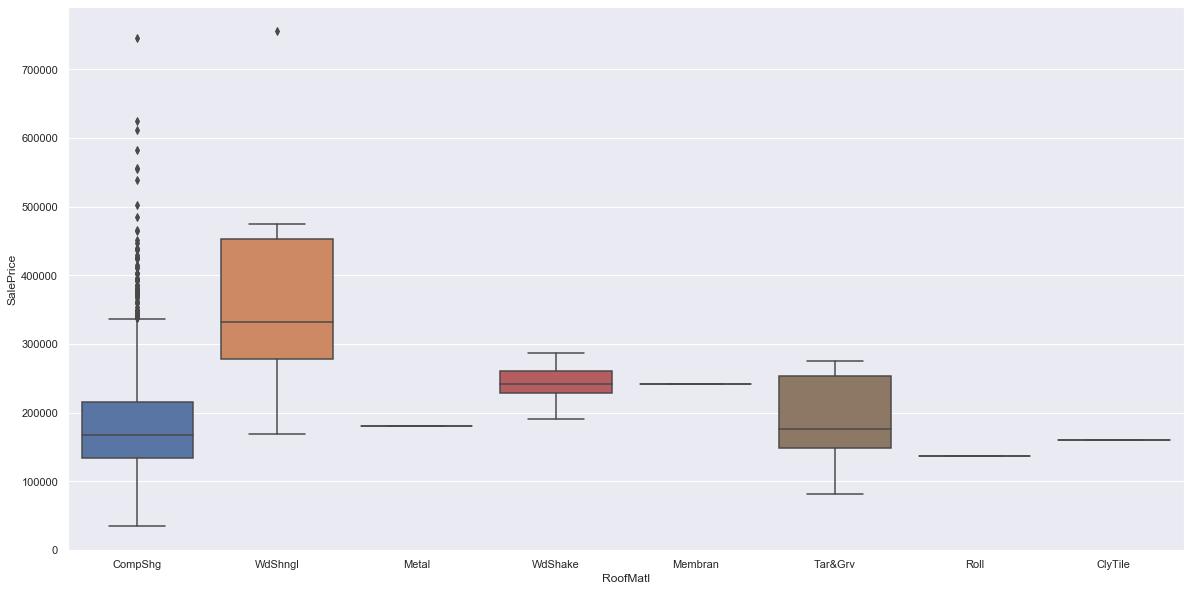

In [153]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = house)
plt.show()

Metal, Membran, Roll and ClyTile these items I will drop here, as all these items are only one in number. 

In [154]:
# For column RoofMatl converting to dummy variables. 

RoofMatl_1 = pd.get_dummies(house['RoofMatl'], drop_first = False, prefix = 'RoofMatl')
RoofMatl_1.drop(['RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_ClyTile', 'RoofMatl_Membran'], axis = 1, inplace = True)
RoofMatl_1.head(2)

,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,1,0,0,0
1,1,0,0,0


In [155]:
# Add the results to the original house dataframe

house = pd.concat([house, RoofMatl_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,...,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,60,65.0,8450,7,5,2003,2003,CompShg,VinylSd,VinylSd,...,0,1,0,0,0,0,1,0,0,0
1,20,80.0,9600,6,8,1976,1976,CompShg,MetalSd,MetalSd,...,0,1,0,0,0,0,1,0,0,0


In [156]:
# Will drop column 'HouseStyle'
house.drop(['RoofMatl'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,...,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,60,65.0,8450,7,5,2003,2003,VinylSd,VinylSd,196.0,...,0,1,0,0,0,0,1,0,0,0
1,20,80.0,9600,6,8,1976,1976,MetalSd,MetalSd,0.0,...,0,1,0,0,0,0,1,0,0,0


In [157]:
house.Exterior1st.value_counts()

VinylSd    498
HdBoard    215
MetalSd    205
Wd Sdng    187
Plywood    105
CemntBd     54
BrkFace     49
Stucco      23
WdShing     22
AsbShng     15
Stone        2
BrkComm      2
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

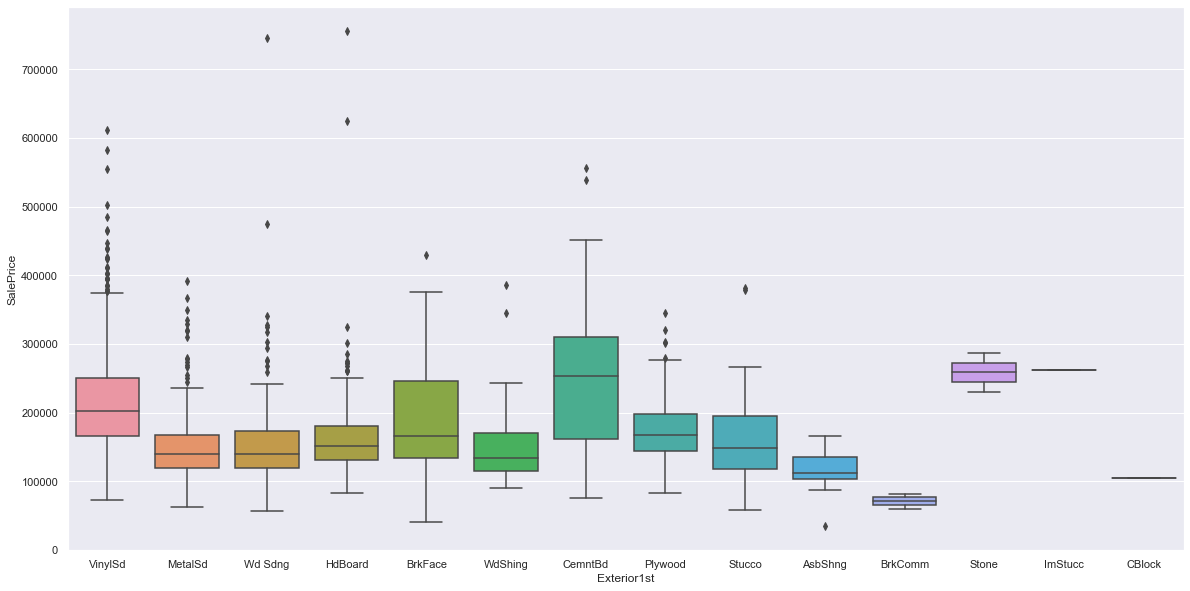

In [158]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = house)
plt.show()

I will drop here BrkComm, ImStucc and CBlock. 

In [159]:
# For column Exterior1st converting to dummy variables. 

Exterior1st_1 = pd.get_dummies(house['Exterior1st'], drop_first = False, prefix = 'Exterior1st')
Exterior1st_1.drop(['Exterior1st_BrkComm', 'Exterior1st_ImStucc', 'Exterior1st_CBlock'], axis = 1, inplace = True)
Exterior1st_1.head(2)

,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0


In [160]:
# Add the results to the original house dataframe

house = pd.concat([house, Exterior1st_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,...,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,65.0,8450,7,5,2003,2003,VinylSd,VinylSd,196.0,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,MetalSd,MetalSd,0.0,...,0,0,0,1,0,0,0,0,0,0


In [161]:
# Will drop column 'Exterior1st'
house.drop(['Exterior1st'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterQual,...,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,65.0,8450,7,5,2003,2003,VinylSd,196.0,Gd,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,MetalSd,0.0,TA,...,0,0,0,1,0,0,0,0,0,0


In [162]:
house.Exterior2nd.value_counts()

VinylSd    487
HdBoard    201
MetalSd    201
Wd Sdng    181
Plywood    133
CmentBd     53
Wd Shng     33
BrkFace     24
Stucco      24
AsbShng     16
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      2
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

Comparing 'Exterior1st' with 'Exterior2nd', distribution of items are very similar in these two, so I will drop column 'Exterior2nd'.


In [163]:
# Will drop column 'Exterior2nd'
house.drop(['Exterior2nd'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,65.0,8450,7,5,2003,2003,196.0,Gd,TA,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,TA,TA,...,0,0,0,1,0,0,0,0,0,0


In [164]:
house.ExterQual.value_counts()

TA    833
Gd    487
Ex     52
Fa      7
Name: ExterQual, dtype: int64

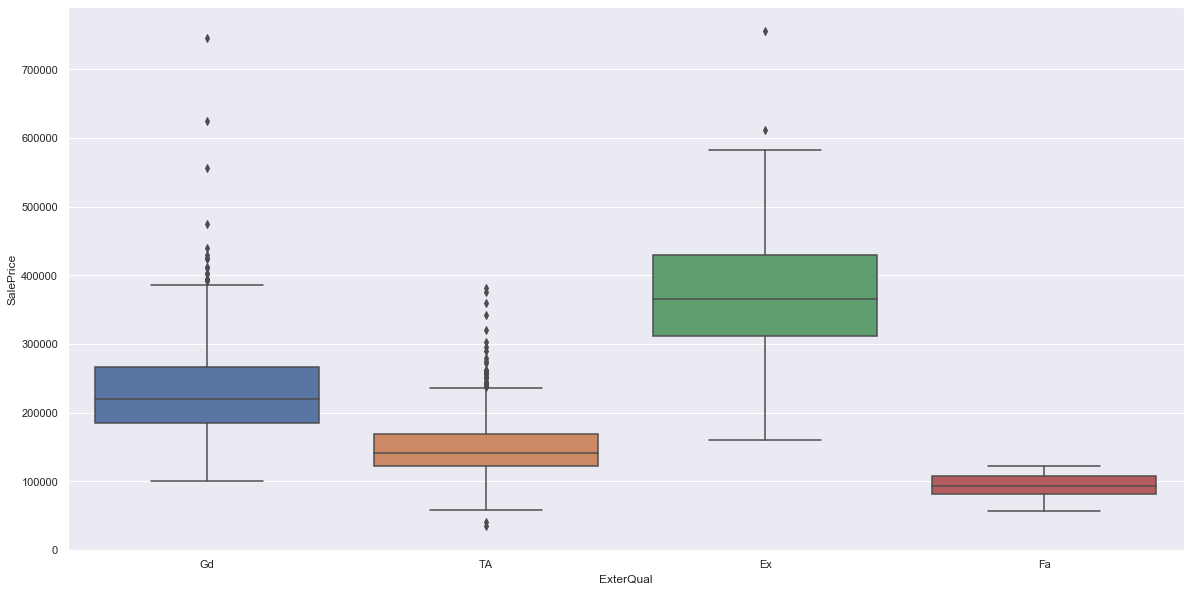

In [165]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = house)
plt.show()

In [166]:
# For column ExterQual converting to dummy variables. 

ExterQual_1 = pd.get_dummies(house['ExterQual'], drop_first = False, prefix = 'ExterQual')
ExterQual_1.drop(['ExterQual_Fa'], axis = 1, inplace = True)
ExterQual_1.head(2)

,ExterQual_Ex,ExterQual_Gd,ExterQual_TA
0,0,1,0
1,0,0,1


In [167]:
# Add the results to the original house dataframe

house = pd.concat([house, ExterQual_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterQual_Ex,ExterQual_Gd,ExterQual_TA
0,60,65.0,8450,7,5,2003,2003,196.0,Gd,TA,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,TA,TA,...,1,0,0,0,0,0,0,0,0,1


In [168]:
# Will drop column 'ExterQual'
house.drop(['ExterQual'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,Foundation,...,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterQual_Ex,ExterQual_Gd,ExterQual_TA
0,60,65.0,8450,7,5,2003,2003,196.0,TA,PConc,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,TA,CBlock,...,1,0,0,0,0,0,0,0,0,1


In [169]:
house.ExterCond.value_counts()

TA    1221
Gd     138
Fa      18
Ex       2
Name: ExterCond, dtype: int64

In [170]:
# For column ExterCond converting to dummy variables. 

ExterCond_1 = pd.get_dummies(house['ExterCond'], drop_first = False, prefix = 'ExterCond')
ExterCond_1.head(2)

,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA
0,0,0,0,1
1,0,0,0,1


In [171]:
# Add the results to the original house dataframe

house = pd.concat([house, ExterCond_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,Foundation,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA
0,60,65.0,8450,7,5,2003,2003,196.0,TA,PConc,...,1,0,0,0,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,TA,CBlock,...,0,0,0,0,0,1,0,0,0,1


In [172]:
# Will drop column 'ExterCond'
house.drop(['ExterCond'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,BsmtCond,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA
0,60,65.0,8450,7,5,2003,2003,196.0,PConc,TA,...,1,0,0,0,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,CBlock,TA,...,0,0,0,0,0,1,0,0,0,1


In [173]:
house.Foundation.value_counts()

PConc     633
CBlock    588
BrkTil    129
Slab       20
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [174]:
# For column Foundation converting to dummy variables. 

Foundation_1 = pd.get_dummies(house['Foundation'], drop_first = False, prefix = 'Foundation')
Foundation_1.head(2)

,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0,0,1,0,0,0
1,0,1,0,0,0,0


In [175]:
# Add the results to the original house dataframe

house = pd.concat([house, Foundation_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,BsmtCond,...,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,65.0,8450,7,5,2003,2003,196.0,PConc,TA,...,0,0,0,1,0,0,1,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,CBlock,TA,...,0,0,0,1,0,1,0,0,0,0


In [176]:
# Will drop column 'Foundation'
house.drop(['Foundation'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtCond,BsmtFinSF1,...,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,65.0,8450,7,5,2003,2003,196.0,TA,706,...,0,0,0,1,0,0,1,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,TA,978,...,0,0,0,1,0,1,0,0,0,0


In [177]:
house.BsmtCond.value_counts()

TA    1277
Gd      63
Fa      38
Po       1
Name: BsmtCond, dtype: int64

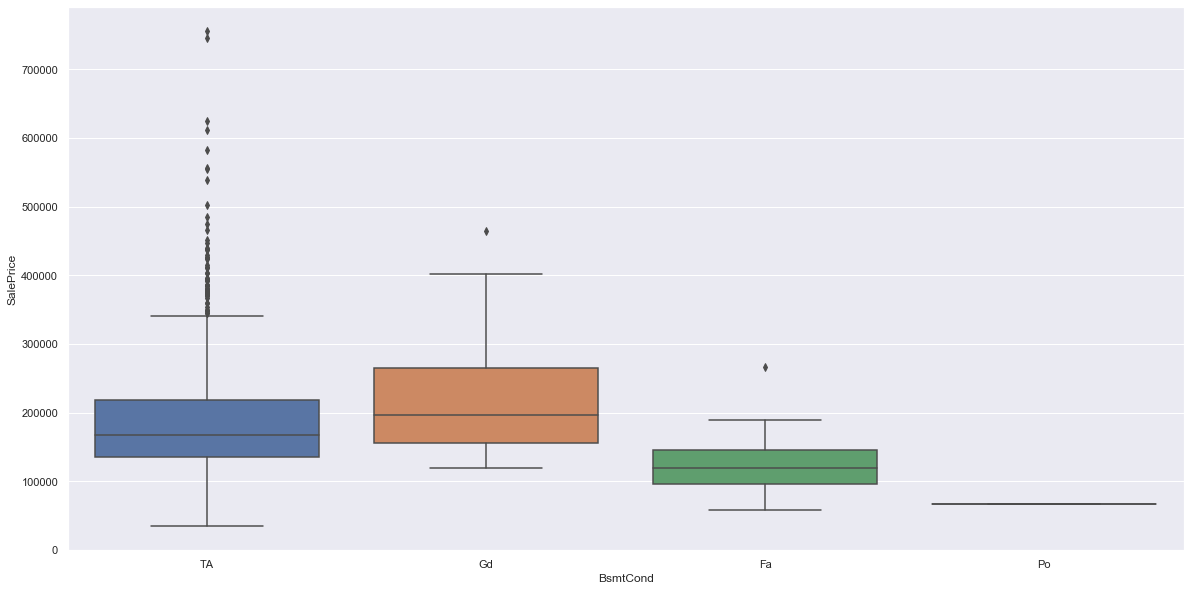

In [178]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = house)
plt.show()

In [179]:
# For column BsmtCond converting to dummy variables, will drop item 'Po' here. 

BsmtCond_1 = pd.get_dummies(house['BsmtCond'], drop_first = False, prefix = 'BsmtCond')
BsmtCond_1.drop(['BsmtCond_Po'], axis = 1, inplace = True)
BsmtCond_1.head(2)

,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA
0,0,0,1
1,0,0,1


In [180]:
# Add the results to the original house dataframe

house = pd.concat([house, BsmtCond_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtCond,BsmtFinSF1,...,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA
0,60,65.0,8450,7,5,2003,2003,196.0,TA,706,...,1,0,0,1,0,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,TA,978,...,1,0,1,0,0,0,0,0,0,1


In [181]:
# Will drop column 'BsmtCond'
house.drop(['BsmtCond'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,0,0,1,0,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,0,1,0,0,0,0,0,0,1


In [182]:
# Will drop here column 'YearRemodAdd', as no any information regarding remodeling is provided here.
house.drop(['YearRemodAdd'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,1,0,0,1,0,0,0,0,0,1
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,1,0,1,0,0,0,0,0,0,1


Age of the property will be more meaningful compared to the Year built, so with this information I will evaluate age of each house and add it to a separate column and will drop the column 'YearBuilt'. 

In [183]:
# Age of each house calculation, current year 2020 has been taken here as reference
house['Age'] = 2020 - house['YearBuilt']
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,Age
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,0,0,1,0,0,0,0,0,1,17
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,0,1,0,0,0,0,0,0,1,44


In [184]:
# Will drop here column 'YearBuilt'
house.drop(['YearBuilt'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,Age
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,1,0,0,0,0,0,1,17
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,1,0,0,0,0,0,0,1,44


In [185]:
house.Heating.value_counts()

GasA     1353
GasW       17
Wall        4
Grav        3
OthW        1
Floor       1
Name: Heating, dtype: int64

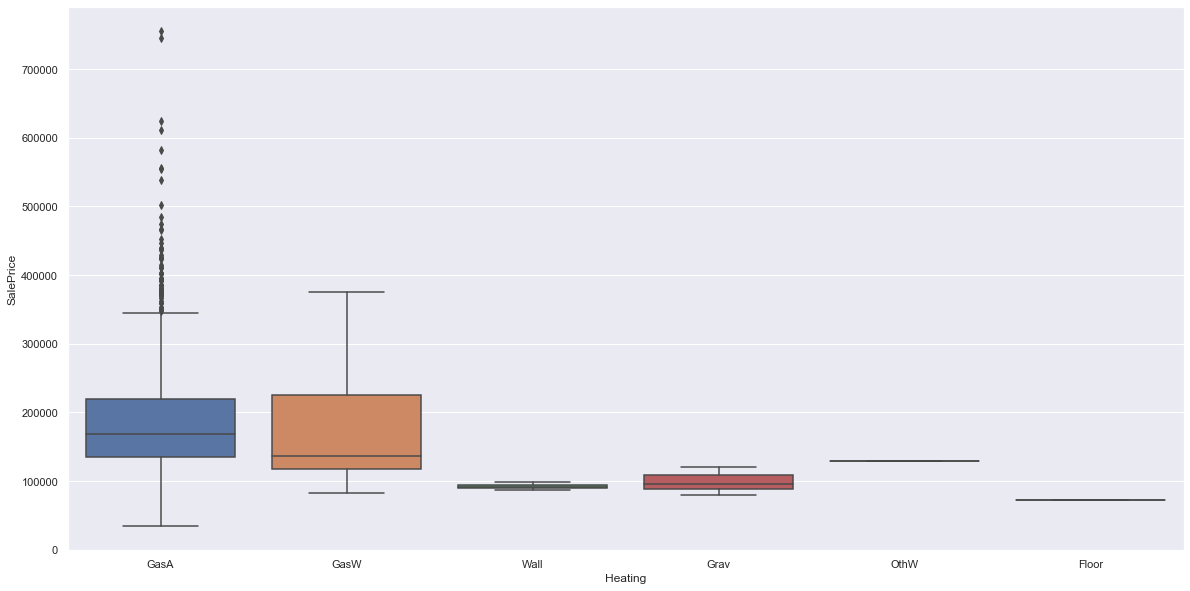

In [186]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = house)
plt.show()

From this box plot it is seen that mainly 'GasA' and 'GasW' types of heating are used by the houses, so I will drop remainings other types.

In [187]:
# For column Heating converting to dummy variables 

Heating_1 = pd.get_dummies(house['Heating'], drop_first = False, prefix = 'Heating')
Heating_1.drop(['Heating_Wall', 'Heating_Grav', 'Heating_OthW', 'Heating_Floor'], axis = 1, inplace = True)
Heating_1.head(2)

,Heating_GasA,Heating_GasW
0,1,0
1,1,0


In [188]:
# Add the results to the original house dataframe

house = pd.concat([house, Heating_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,Age,Heating_GasA,Heating_GasW
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,1,0,0,0,0,0,1,17,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,0,0,1,44,1,0


In [189]:
# Will drop column 'Heating'
house.drop(['Heating'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,Age,Heating_GasA,Heating_GasW
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,1,0,0,0,0,0,1,17,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,0,0,1,44,1,0


In [190]:
house.HeatingQC.value_counts()

Ex    720
TA    396
Gd    222
Fa     40
Po      1
Name: HeatingQC, dtype: int64

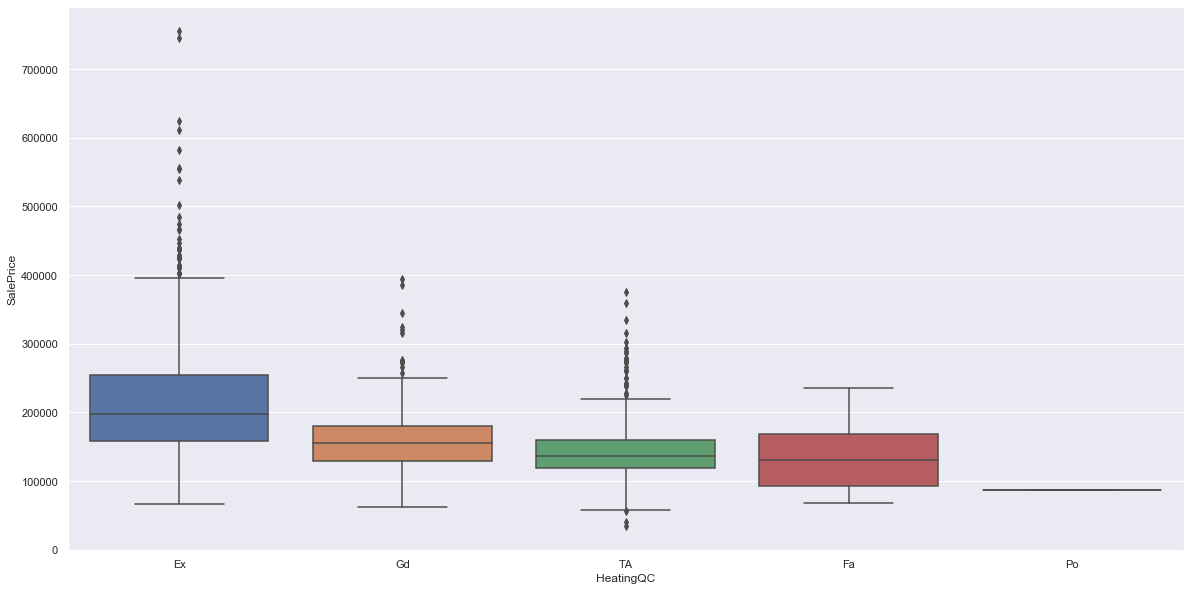

In [191]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = house)
plt.show()

In [192]:
# For column HeatingQC converting to dummy variables 

HeatingQC_1 = pd.get_dummies(house['HeatingQC'], drop_first = False, prefix = 'HeatingQC')
HeatingQC_1.drop(['HeatingQC_Po'], axis = 1, inplace = True)
HeatingQC_1.head(2)

,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA
0,1,0,0,0
1,1,0,0,0


In [193]:
# Add the results to the original house dataframe

house = pd.concat([house, HeatingQC_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,Age,Heating_GasA,Heating_GasW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,1,17,1,0,1,0,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,1,44,1,0,1,0,0,0


In [194]:
# Will drop column 'HeatingQC'
house.drop(['HeatingQC'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,Age,Heating_GasA,Heating_GasW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,1,17,1,0,1,0,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,1,44,1,0,1,0,0,0


In [195]:
house.CentralAir.value_counts()

Y    1310
N      69
Name: CentralAir, dtype: int64

In [196]:
# For column CentralAir converting to dummy variables 

CentralAir_1 = pd.get_dummies(house['CentralAir'], drop_first = True, prefix = 'CentralAir')
CentralAir_1.head(2)

,CentralAir_Y
0,1
1,1


In [197]:
# Add the results to the original house dataframe

house = pd.concat([house, CentralAir_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtCond_Gd,BsmtCond_TA,Age,Heating_GasA,Heating_GasW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,1,17,1,0,1,0,0,0,1
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,1,44,1,0,1,0,0,0,1


In [198]:
# Will drop column 'CentralAir'
house.drop(['CentralAir'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtCond_Gd,BsmtCond_TA,Age,Heating_GasA,Heating_GasW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,1,17,1,0,1,0,0,0,1
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,1,44,1,0,1,0,0,0,1


In [199]:
house.Electrical.value_counts()

SBrkr    1273
FuseA      81
FuseF      22
FuseP       2
Mix         1
Name: Electrical, dtype: int64

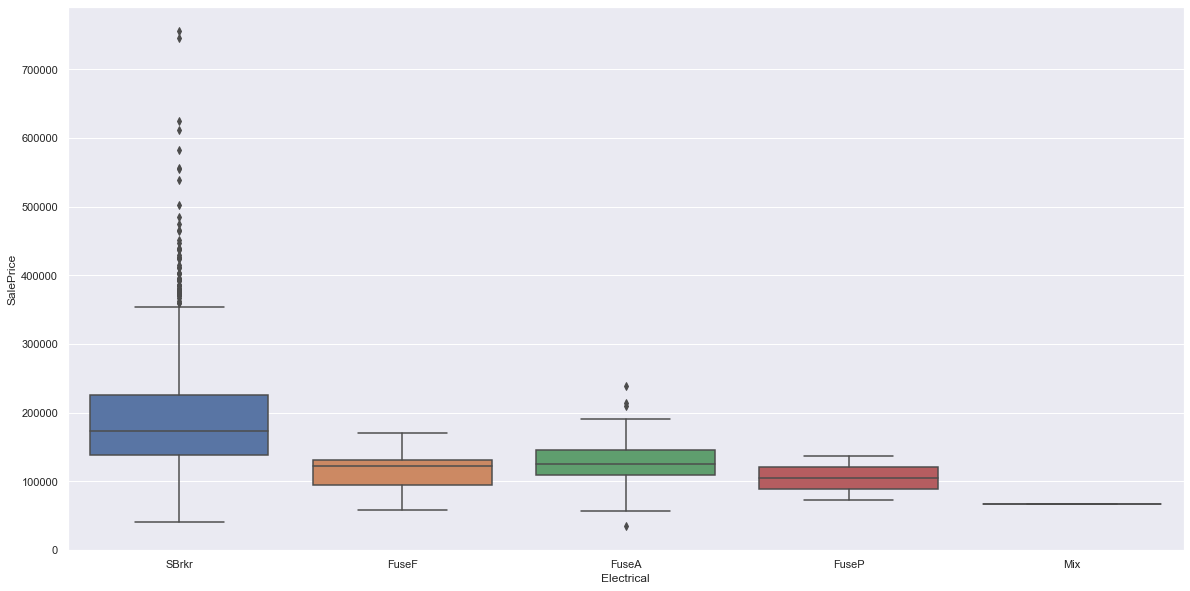

In [200]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = house)
plt.show()

In [201]:
# For column Electrical converting to dummy variables 

Electrical_1 = pd.get_dummies(house['Electrical'], drop_first = False, prefix = 'Electrical')
Electrical_1.drop(['Electrical_Mix'], axis = 1, inplace = True)
Electrical_1.head(2)

,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr
0,0,0,0,1
1,0,0,0,1


In [202]:
# Add the results to the original house dataframe

house = pd.concat([house, Electrical_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Heating_GasW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,1,0,0,0,1,0,0,0,1
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,1,0,0,0,1,0,0,0,1


In [203]:
# Will drop column 'Electrical'
house.drop(['Electrical'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Heating_GasW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,1,0,0,0,1,0,0,0,1
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,1,0,0,0,1,0,0,0,1


In [204]:
house.KitchenQual.value_counts()

TA    676
Gd    581
Ex     98
Fa     24
Name: KitchenQual, dtype: int64

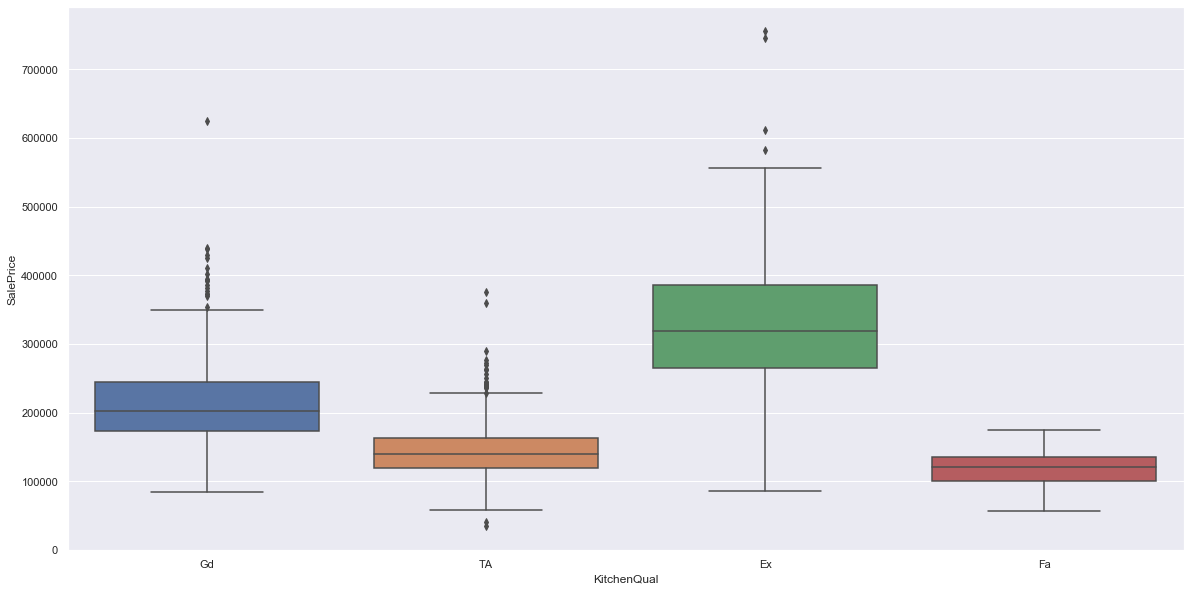

In [205]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = house)
plt.show()

In [206]:
# For column KitchenQual converting to dummy variables 

KitchenQual_1 = pd.get_dummies(house['KitchenQual'], drop_first = False, prefix = 'KitchenQual')
KitchenQual_1.drop(['KitchenQual_Fa'], axis = 1, inplace = True)
KitchenQual_1.head(2)

,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA
0,0,1,0
1,0,0,1


In [207]:
# Add the results to the original house dataframe

house = pd.concat([house, KitchenQual_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,1,0,0,0,1,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,1,0,0,0,1,0,0,1


In [208]:
# Will drop column 'KitchenQual'
house.drop(['KitchenQual'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,1,0,0,0,1,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,1,0,0,0,1,0,0,1


In [209]:
house.Functional.value_counts()

Typ     1287
Min2      32
Min1      31
Mod       13
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64

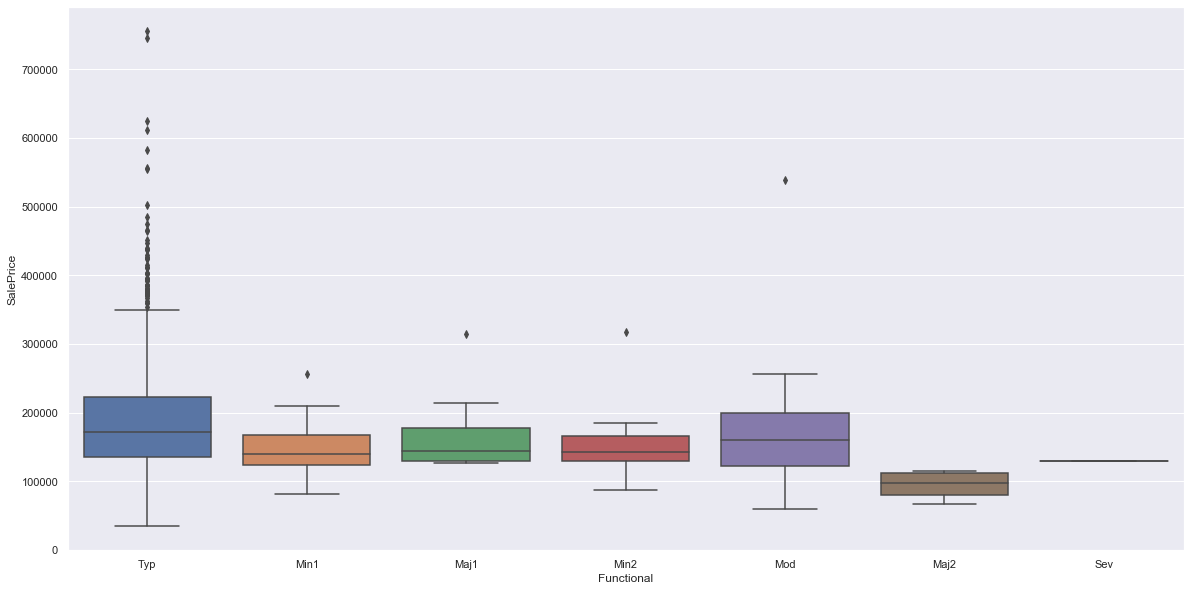

In [210]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = house)
plt.show()

In [211]:
# For column Functional converting to dummy variables 

Functional_1 = pd.get_dummies(house['Functional'], drop_first = False, prefix = 'Functional')
Functional_1.drop(['Functional_Sev'], axis = 1, inplace = True) #dropping 'Sev' type as only 1 house is using it
Functional_1.head(2)

,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ
0,0,0,0,0,0,1
1,0,0,0,0,0,1


In [212]:
# Add the results to the original house dataframe

house = pd.concat([house, Functional_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,1,0,1,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,1,0,0,1,0,0,0,0,0,1


In [213]:
# Will drop column 'Functional'
house.drop(['Functional'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,1,0,1,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,1,0,0,1,0,0,0,0,0,1


In [214]:
house.PavedDrive.value_counts()

Y    1293
N      58
P      28
Name: PavedDrive, dtype: int64

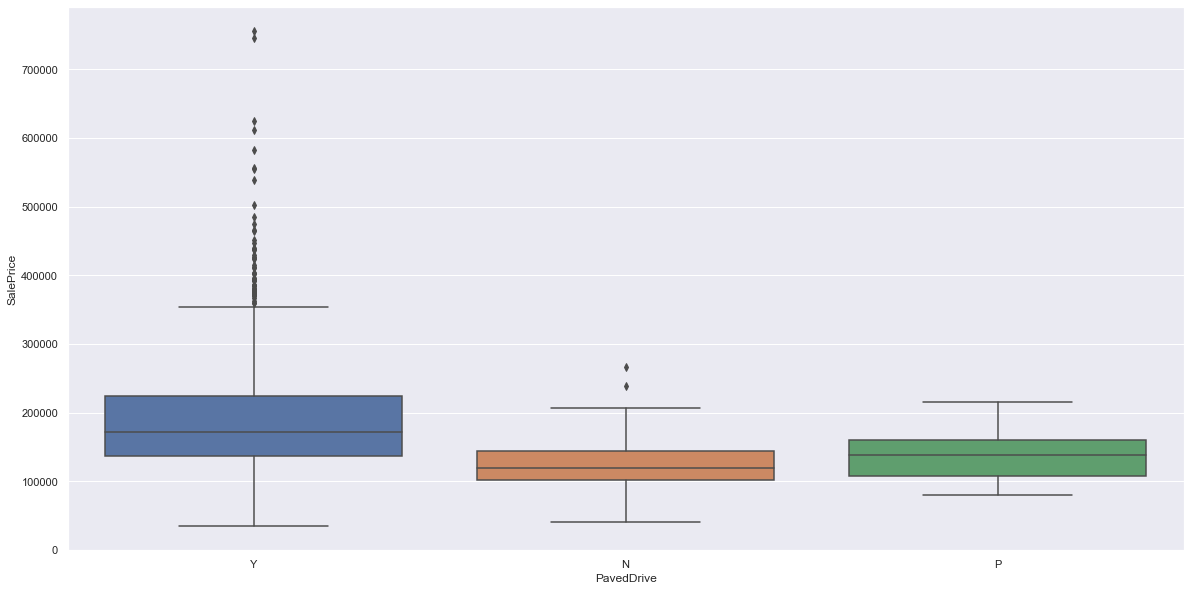

In [215]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = house)
plt.show()

In [216]:
# For column PavedDrive converting to dummy variables 

PavedDrive_1 = pd.get_dummies(house['PavedDrive'], drop_first = False, prefix = 'PavedDrive')
PavedDrive_1.drop(['PavedDrive_N'], axis = 1, inplace = True) 
PavedDrive_1.head(2)

,PavedDrive_P,PavedDrive_Y
0,0,1
1,0,1


In [217]:
# Add the results to the original house dataframe

house = pd.concat([house, PavedDrive_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,PavedDrive_P,PavedDrive_Y
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,1,0,0,0,0,0,0,1,0,1
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,1,0,0,0,0,0,1,0,1


In [218]:
# Will drop column 'PavedDrive'
house.drop(['PavedDrive'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,PavedDrive_P,PavedDrive_Y
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,1,0,0,0,0,0,0,1,0,1
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,1,0,0,0,0,0,1,0,1


In [219]:
house.SaleType.value_counts()

WD       1194
New       120
COD        43
ConLD       7
ConLI       4
ConLw       4
CWD         4
Con         2
Oth         1
Name: SaleType, dtype: int64

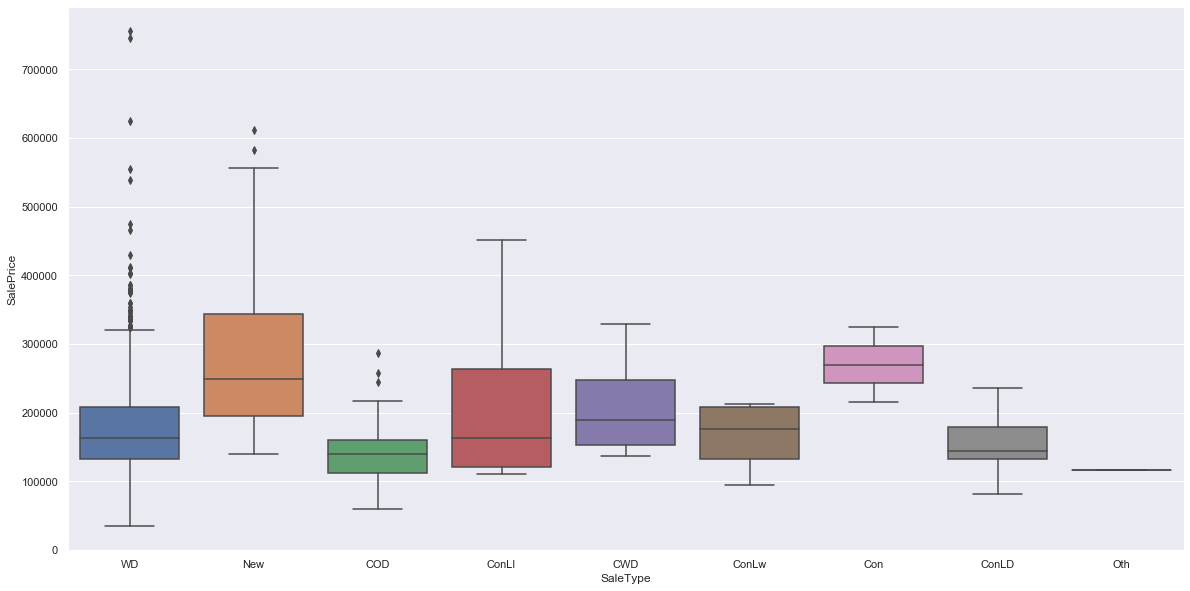

In [220]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = house)
plt.show()

In [221]:
# For column SaleType converting to dummy variables 

SaleType_1 = pd.get_dummies(house['SaleType'], drop_first = False, prefix = 'SaleType')
SaleType_1.drop(['SaleType_Oth'], axis = 1, inplace = True) 
SaleType_1.head(2)

,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1


In [222]:
# Add the results to the original house dataframe

house = pd.concat([house, SaleType_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,1,0,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,1,0,0,0,0,0,0,0,1


In [223]:
# Will drop column 'SaleType'
house.drop(['SaleType'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,1,0,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,1,0,0,0,0,0,0,0,1


In [224]:
house.SaleCondition.value_counts()

Normal     1137
Partial     123
Abnorml      87
Family       20
Alloca       11
AdjLand       1
Name: SaleCondition, dtype: int64

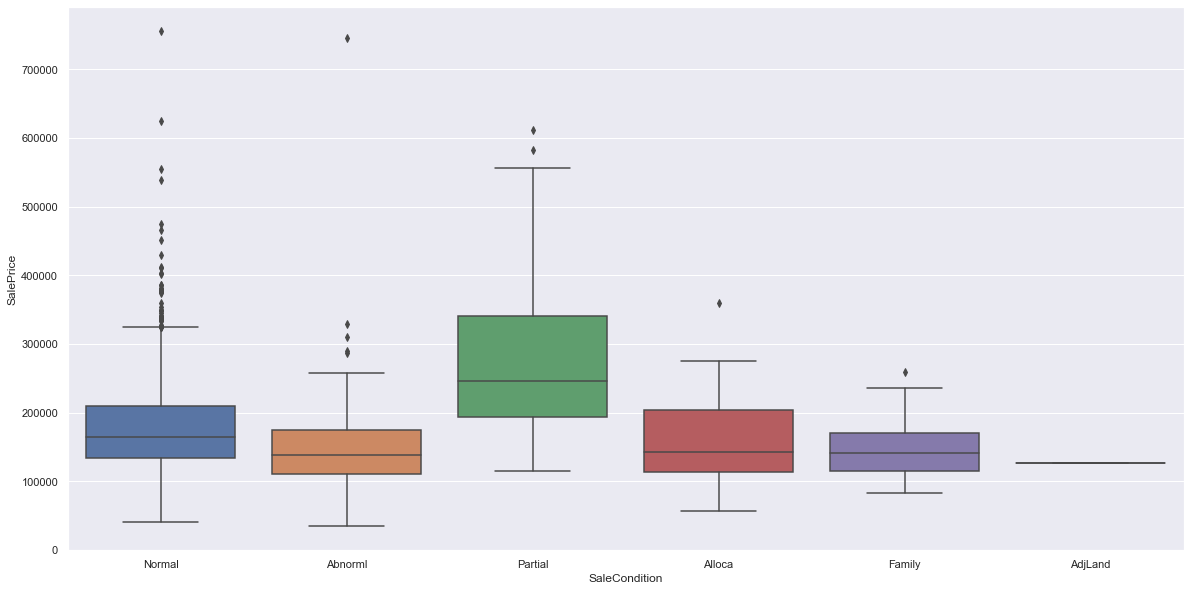

In [225]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.0)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = house)
plt.show()

In [226]:
# For column SaleCondition converting to dummy variables 

SaleCondition_1 = pd.get_dummies(house['SaleCondition'], drop_first = False, prefix = 'SaleCondition')
SaleCondition_1.drop(['SaleCondition_AdjLand'], axis = 1, inplace = True) 
SaleCondition_1.head(2)

,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0
1,0,0,0,1,0


In [227]:
# Add the results to the original house dataframe

house = pd.concat([house, SaleCondition_1], axis = 1)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0


In [228]:
# Will drop column 'SaleCondition'
house.drop(['SaleCondition'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0


Text(0, 0.5, 'SalePrice')

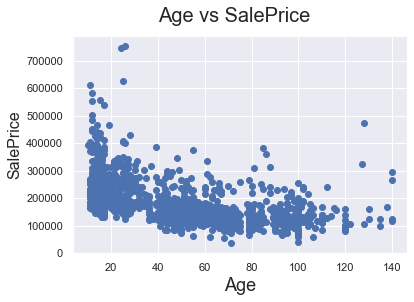

In [229]:
# Plottting Age vs.SalePrice

fig = plt.figure()
plt.scatter(house['Age'], house['SalePrice'])
fig.suptitle('Age vs SalePrice', fontsize=20)              # Plot heading 
plt.xlabel('Age', fontsize=18)                          # X-label
plt.ylabel('SalePrice', fontsize=16)                          # Y-label

In the above scatter plot there are few outliers with sale price, so using this column as it will not give a good prediction from a final output regression model and results will be biased, so I will transform the column 'SalePrice' on log scale for better treatment of these outliers. 

Text(0, 0.5, 'SalePrice')

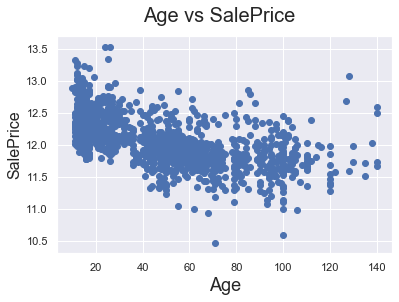

In [230]:
# Plottting Age vs.SalePrice on log scale

fig = plt.figure()
plt.scatter(house['Age'], np.log(house['SalePrice']))  # here column house['SalePrice'] considered on log scale
fig.suptitle('Age vs SalePrice', fontsize=20)          # Plot heading 
plt.xlabel('Age', fontsize=18)                         # X-label
plt.ylabel('SalePrice', fontsize=16)                   # Y-label

In [231]:
# Transforming column 'SalePrice' to log scale with base'e' 
house['log_SalePrice'] = np.log(house['SalePrice'])
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,log_SalePrice
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,1,0,0,0,1,0,12.247694
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,1,0,0,0,1,0,12.109011


In [232]:
house[['SalePrice', 'log_SalePrice']].head(5)

,SalePrice,log_SalePrice
0,208500,12.247694
1,181500,12.109011
2,223500,12.317167
3,140000,11.849398
4,250000,12.429216


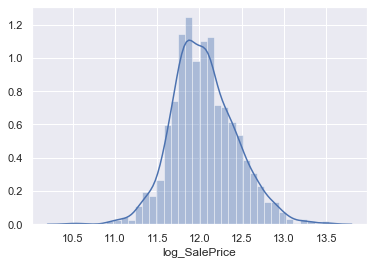

In [233]:
# Checking distribution of the sale price on log scale
sns.distplot(house['log_SalePrice'])
plt.show()

It can be observed that sale price seems to have a good bell curve centered about the mid of the X-axis.

In [234]:
# Now will drop the original column 'SalePrice'
house.drop(['SalePrice'], axis = 1, inplace = True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,log_SalePrice
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,1,0,0,0,1,0,12.247694
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,1,0,0,0,1,0,12.109011


In [235]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Columns: 211 entries, MSSubClass to log_SalePrice
dtypes: float64(4), int64(32), uint8(175)
memory usage: 674.3 KB


In [236]:
house.shape

(1379, 211)

## Step-3: Splitting data in X and Y

In [237]:
y = house.pop('log_SalePrice')
X = house

In [238]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=210)

## Step-4: Scaling and train, test split

In [239]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

In [240]:
# scaling the features
from sklearn.preprocessing import StandardScaler

In [241]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [242]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Step-5: Model Building and Evaluation

### Ridge Regression

In [243]:
# list of alphas to tune
params1 = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 300, 500, 700, 1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv1 = GridSearchCV(estimator = ridge, 
                        param_grid = params1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 300, 500, 700, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [244]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1 = cv_results1[cv_results1['param_alpha']<=500]
cv_results1.head(28)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.191409,0.372827,0.000800,0.001600,0.0001,{'alpha': 0.0001},-0.103541,-0.091130,-0.099253,-0.080968,...,-0.097945,0.011427,29,-0.058186,-0.057475,-0.058134,-0.058110,-0.058337,-0.058048,0.000297
1,0.006404,0.001960,0.001599,0.001958,0.001,{'alpha': 0.001},-0.104089,-0.090436,-0.097314,-0.080928,...,-0.097334,0.011286,28,-0.058266,-0.057791,-0.058182,-0.058234,-0.058361,-0.058167,0.000197
2,0.006400,0.004081,0.001739,0.002142,0.01,{'alpha': 0.01},-0.107135,-0.088878,-0.096233,-0.081591,...,-0.096396,0.010286,26,-0.060051,-0.060644,-0.058302,-0.060685,-0.058760,-0.059688,0.000982
3,0.008002,0.004382,0.001600,0.001960,0.05,{'alpha': 0.05},-0.111040,-0.089078,-0.096210,-0.082922,...,-0.096140,0.009744,25,-0.062581,-0.064252,-0.058531,-0.064099,-0.060717,-0.062036,0.002168
4,0.008000,0.002530,0.000800,0.001599,0.1,{'alpha': 0.1},-0.110738,-0.088804,-0.096143,-0.083703,...,-0.095651,0.009250,24,-0.063437,-0.065413,-0.058776,-0.065143,-0.062371,-0.063028,0.002402
5,0.007207,0.001603,0.003193,0.001596,0.2,{'alpha': 0.2},-0.109636,-0.088711,-0.096114,-0.084002,...,-0.095319,0.008778,23,-0.064248,-0.066484,-0.059172,-0.065997,-0.064290,-0.064038,0.002592
6,0.006400,0.001959,0.000409,0.000819,0.3,{'alpha': 0.3},-0.108750,-0.089208,-0.096111,-0.084196,...,-0.095224,0.008348,22,-0.064744,-0.067209,-0.059489,-0.066570,-0.065366,-0.064676,0.002735
7,0.010381,0.005972,0.000800,0.001600,0.4,{'alpha': 0.4},-0.108045,-0.089605,-0.096087,-0.084182,...,-0.095100,0.008051,21,-0.065144,-0.067768,-0.059745,-0.067020,-0.066124,-0.065160,0.002847
8,0.008008,0.002542,0.000000,0.000000,0.5,{'alpha': 0.5},-0.107439,-0.089893,-0.096062,-0.084064,...,-0.094955,0.007834,20,-0.065517,-0.068246,-0.059959,-0.067418,-0.066728,-0.065574,0.002946
9,0.006401,0.001959,0.000000,0.000000,0.6,{'alpha': 0.6},-0.106895,-0.090074,-0.096032,-0.084003,...,-0.094812,0.007640,19,-0.065847,-0.068682,-0.060152,-0.067753,-0.067231,-0.065933,0.003033


In [245]:
cv_results1.shape

(28, 21)

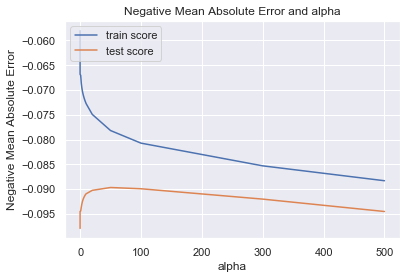

In [246]:
# plotting mean test and train scoes with alpha 
cv_results1['param_alpha'] = cv_results1['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From above plot it can be observed that as alpha values are increased, error with train increases and it is expected with increase in regularization. With test data, error 1st decreases to some minimum value and then it starts increasing. This minimum error with test data appears around 50, but exact value I would be exploring further.

In [247]:
# list of alphas to tune
params1 = {'alpha': [0.0001, 0.1, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 
                   85.0, 90.0, 95.0, 100.0, 110.0, 120.0, 130.0,150]}


ridge = Ridge()

# cross validation
folds = 5
model_cv1 = GridSearchCV(estimator = ridge, 
                        param_grid = params1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.1, 5.0, 10.0, 15.0, 20.0, 25.0,
                                   30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0,
                                   65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0,
                                   100.0, 110.0, 120.0, 130.0, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [248]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1 = cv_results1[cv_results1['param_alpha']<=150]
cv_results1.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007251,0.001628,0.000800,0.001600,0.0001,{'alpha': 0.0001},-0.103541,-0.091130,-0.099253,-0.080968,...,-0.097945,0.011427,26,-0.058186,-0.057475,-0.058134,-0.058110,-0.058337,-0.058048,0.000297
1,0.007973,0.002222,0.002790,0.001601,0.1,{'alpha': 0.1},-0.110738,-0.088804,-0.096143,-0.083703,...,-0.095651,0.009250,25,-0.063437,-0.065413,-0.058776,-0.065143,-0.062371,-0.063028,0.002402
2,0.008210,0.000978,0.002035,0.001790,5,{'alpha': 5.0},-0.100036,-0.088951,-0.094169,-0.084506,...,-0.092067,0.005199,24,-0.071866,-0.073321,-0.063300,-0.072897,-0.073176,-0.070912,0.003840
3,0.008895,0.002971,0.000800,0.001600,10,{'alpha': 10.0},-0.096616,-0.087206,-0.093065,-0.085504,...,-0.090947,0.004055,23,-0.074013,-0.075037,-0.064860,-0.075093,-0.074874,-0.072775,0.003977
4,0.008812,0.001599,0.002400,0.001959,15,{'alpha': 15.0},-0.094573,-0.086272,-0.092804,-0.086123,...,-0.090526,0.003591,22,-0.075325,-0.076397,-0.065957,-0.076373,-0.075948,-0.074000,0.004040
5,0.010448,0.002287,0.001599,0.001958,20,{'alpha': 20.0},-0.093092,-0.085705,-0.092690,-0.086617,...,-0.090260,0.003364,19,-0.076339,-0.077453,-0.066802,-0.077310,-0.076764,-0.074933,0.004085
6,0.008217,0.001023,0.001995,0.001788,25,{'alpha': 25.0},-0.091893,-0.085439,-0.092727,-0.087006,...,-0.090099,0.003241,17,-0.077120,-0.078279,-0.067554,-0.078082,-0.077445,-0.075696,0.004092
7,0.008678,0.001678,0.002400,0.001960,30,{'alpha': 30.0},-0.090883,-0.085235,-0.092769,-0.087351,...,-0.089972,0.003203,15,-0.077793,-0.078948,-0.068214,-0.078674,-0.078061,-0.076338,0.004083
8,0.011385,0.002377,0.000800,0.001599,35,{'alpha': 35.0},-0.090008,-0.085043,-0.092791,-0.087661,...,-0.089861,0.003230,12,-0.078400,-0.079551,-0.068807,-0.079192,-0.078561,-0.076902,0.004069
9,0.008838,0.001584,0.000800,0.001600,40,{'alpha': 40.0},-0.089246,-0.084993,-0.092823,-0.087933,...,-0.089790,0.003265,9,-0.078926,-0.080055,-0.069331,-0.079621,-0.078991,-0.077385,0.004048


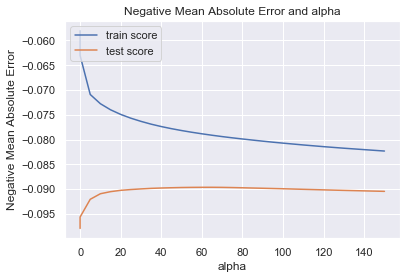

In [249]:
# plotting mean test and train scoes with alpha 
cv_results1['param_alpha'] = cv_results1['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Mean absolute error with test score is found to be minimum at alpha value 65 and hence this is the optimum value of alpha (or lambda) for ridge regression. 

In [250]:
# Ridge regression
lm1 = Ridge(alpha=65)
lm1.fit(X_train, y_train)

Ridge(alpha=65, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [251]:
from sklearn import metrics
from sklearn.metrics import r2_score
# predict R square score
y_train_pred = lm1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9003013675579147
0.871080085069331


R2 suare values of both train and test predictions from the regression model is found to be close to 0.9 and it is indicating a good fit of the regression model on the data.

In [252]:
# Ridge model parameters
model_parameters1 = list(lm1.coef_)
model_parameters1.insert(0, lm1.intercept_)
model_parameters1 = [round(x, 3) for x in model_parameters1]
cols = X.columns
cols = cols.insert(0, "constant")
listR1 = list(zip(cols, model_parameters1))
listR1

[('constant', 25.784),
 ('MSSubClass', -0.001),
 ('LotFrontage', -0.001),
 ('LotArea', 0.0),
 ('OverallQual', 0.065),
 ('OverallCond', 0.046),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.032),
 ('BsmtHalfBath', 0.006),
 ('FullBath', 0.022),
 ('HalfBath', 0.009),
 ('BedroomAbvGr', -0.002),
 ('KitchenAbvGr', -0.014),
 ('TotRmsAbvGrd', 0.011),
 ('Fireplaces', 0.021),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.053),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('YrSold', -0.007),
 ('Alley_Grvl', -0.006),
 ('Alley_Pave', 0.011),
 ('PoolQC_Ex', 0.009),
 ('PoolQC_Fa', 0.004),
 ('PoolQC_Gd', -0.019),
 ('Fence_GdPrv', 0.002),
 ('Fence_GdWo', -0.005),
 ('Fence_MnPrv', 0.005),
 ('

Although some of the coefficients in the above appears as zero, but those values are actually close to zero, not actual zero. This has been verified by increasing the precision after decimal value. In the regression model here independent variable is logarithm (with base 'e') of the SalePrice, so although here coefficeints of all independent variables appear as small, but when each is calulated as power of exponent (after removal of log scale for the independent variable), then each term of idependent variable in regression equation will be a significant number. So Ridge regression gave a model having many independent variables.   

In [253]:
listR1_1 = pd.DataFrame(listR1) 
listR1_1.columns = ["Variables", "Coefficients"]

In [254]:
# Finding variables having coefficients greater than 0.02 (here 0.02 is a hypothetical number) and also for lesser than 0.02 
listR1_1_0 = listR1_1.loc[(listR1_1['Coefficients']>=0.02) | (listR1_1['Coefficients']<=-0.02), :]
listR1_1_0.sort_values(by = 'Coefficients', ascending = False).head(30)

,Variables,Coefficients
0,constant,25.784
4,OverallQual,0.065
24,GarageCars,0.053
5,OverallCond,0.046
106,Neighborhood_Crawfor,0.045
51,BsmtQual_Ex,0.038
118,Condition1_Norm,0.034
15,BsmtFullBath,0.032
182,CentralAir_Y,0.030
187,KitchenQual_Ex,0.029


Above, important independent variables and their coefficients values have been shown. Coefficeints having positive values indicate that corresponding independent variable directly increases the value of the price of a house and coefficeints having negative values indicate that corresponding independent variable directly decreases the value of the price of a house. For premium price of a house, variables with positive coefficeints can only be considered, whereas for medium and low price ranges, along with few positive coefficeints some negative coefficeints can also be considered. This way management should make a selection of a house for its price evaluation.   

### Equation of the Ridge Regression model can be written as:
$ Ln(SalePrice) = 25.784 + 0.065\times OverallQual + 0.053\times GarageCars + 0.046\times OverallCond + 0.045\times NeighborhoodCrawfor + 0.038\times BsmtQualEx .....-0.021\times MSZoningRM - 0.021\times LandContourBnk - 0.024\times SaleConditionAbnorml .......$ 

### Lasso Regression

In [255]:
# list of alphs to tune

params2 = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 300, 500, 700, 1000]}

lasso = Lasso()

# cross validation
folds = 5
model_cv2 = GridSearchCV(estimator = lasso, 
                        param_grid = params2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 300, 500, 700, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [256]:
cv_results2 = pd.DataFrame(model_cv2.cv_results_)
cv_results2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.205314,0.149857,0.002401,0.00196,0.0001,{'alpha': 0.0001},-0.102588,-0.085876,-0.094541,-0.082278,...,-0.093383,0.008171,2,-0.065461,-0.066709,-0.061172,-0.065943,-0.062419,-0.064341,0.002152
1,0.025597,0.009995,0.002400,0.00196,0.001,{'alpha': 0.001},-0.090772,-0.086787,-0.092788,-0.087933,...,-0.090254,0.002513,1,-0.077860,-0.078665,-0.069161,-0.078661,-0.079181,-0.076706,0.003796
2,0.022420,0.005941,0.002400,0.00320,0.01,{'alpha': 0.01},-0.095037,-0.088731,-0.104422,-0.099129,...,-0.098849,0.006532,3,-0.095504,-0.097690,-0.086288,-0.094585,-0.094663,-0.093746,0.003894
3,0.063199,0.030506,0.001600,0.00196,0.05,{'alpha': 0.05},-0.103838,-0.101161,-0.123530,-0.105677,...,-0.110495,0.008775,4,-0.106827,-0.108628,-0.100001,-0.105736,-0.106253,-0.105489,0.002912
4,0.030511,0.004749,0.001601,0.00196,0.1,{'alpha': 0.1},-0.115120,-0.112912,-0.130478,-0.116211,...,-0.120707,0.007394,8,-0.117445,-0.118770,-0.106672,-0.117576,-0.115296,-0.115152,0.004385


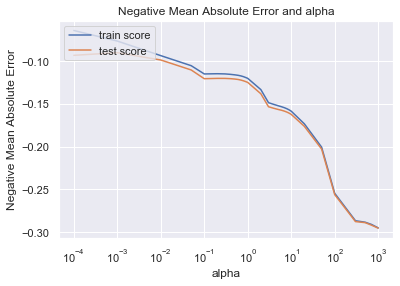

In [257]:
# plotting mean test and train scoes with alpha 
cv_results2['param_alpha'] = cv_results2['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results2['param_alpha'], cv_results2['mean_train_score'])
plt.plot(cv_results2['param_alpha'], cv_results2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xscale('log') #taking xscle on log for better check of train and test score variations
plt.show()

Here lowest value of test score is towards smaller value of alpha, so I will explore this region of alpha 

In [258]:
# final list of alphs 

params2 = {'alpha': [0.00001, 0.00005, 0.00025, 0.00125, 0.00625, 0.03125, 0.15625, 0.78125, 3.90625]}

lasso = Lasso()

# cross validation
model_cv2 = GridSearchCV(estimator = lasso, 
                        param_grid = params2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 5e-05, 0.00025, 0.00125, 0.00625,
                                   0.03125, 0.15625, 0.78125, 3.90625]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [259]:
cv_results2 = pd.DataFrame(model_cv2.cv_results_)
cv_results2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.202075,0.127601,0.002724,0.001545,1e-05,{'alpha': 1e-05},-0.101457,-0.089443,-0.095980,-0.079499,...,-0.094898,0.009855,4,-0.058585,-0.058289,-0.058570,-0.058630,-0.058736,-0.058562,0.000148
1,0.125422,0.033494,0.002400,0.001959,5e-05,{'alpha': 5e-05},-0.097957,-0.085177,-0.094780,-0.079348,...,-0.093085,0.010052,3,-0.061574,-0.062421,-0.059973,-0.061882,-0.060374,-0.061245,0.000924
2,0.052179,0.024912,0.001600,0.001960,0.00025,{'alpha': 0.00025},-0.098395,-0.086369,-0.094582,-0.081799,...,-0.090090,0.005871,1,-0.068505,-0.071232,-0.064023,-0.070064,-0.070377,-0.068840,0.002565
3,0.013706,0.001882,0.001668,0.002046,0.00125,{'alpha': 0.00125},-0.090487,-0.086999,-0.092615,-0.090137,...,-0.091225,0.002942,2,-0.079901,-0.080514,-0.070471,-0.080851,-0.081302,-0.078608,0.004094
4,0.008800,0.001600,0.002400,0.001960,0.00625,{'alpha': 0.00625},-0.093463,-0.086372,-0.101186,-0.098706,...,-0.096963,0.006501,5,-0.092714,-0.093820,-0.084191,-0.092163,-0.091419,-0.090861,0.003426


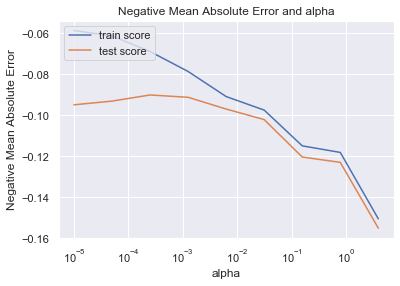

In [260]:
# plotting mean test and train scoes with alpha 
cv_results2['param_alpha'] = cv_results2['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results2['param_alpha'], cv_results2['mean_train_score'])
plt.plot(cv_results2['param_alpha'], cv_results2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xscale('log') #taking xscle on log for better check of train and test score variation
plt.show()

#### Mean absolute error with test score is found to be minimum at alpha value 0.00025 and hence this is the optimum value of alpha (or lambda) for Lasso regression. 

In [261]:
# Lasso regression
lm2 = Lasso(alpha=0.00025)
lm2.fit(X_train, y_train)

Lasso(alpha=0.00025, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [262]:
# predict R2 square
y_train_pred = lm2.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm2.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9277123024463653
0.8608758597539323


Smaller value of alpha (hyperparameter) in case of Lasso, indicating lesser effect of regularization on regression model and hence R2 square for test prediction is having wider gap (smaller here) with the same from train prediction.  

In [263]:
# Lasso model parameters
model_parameters2 = list(lm2.coef_)
model_parameters2.insert(0, lm2.intercept_)
model_parameters2 = [round(x, 3) for x in model_parameters2]
cols = X.columns
cols = cols.insert(0, "constant")
listL1 = list(zip(cols, model_parameters2))
listL1

[('constant', 22.792),
 ('MSSubClass', -0.0),
 ('LotFrontage', -0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.053),
 ('OverallCond', 0.046),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.038),
 ('BsmtHalfBath', 0.008),
 ('FullBath', 0.032),
 ('HalfBath', 0.007),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.039),
 ('TotRmsAbvGrd', 0.013),
 ('Fireplaces', 0.009),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.076),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.006),
 ('Alley_Grvl', -0.0),
 ('Alley_Pave', 0.016),
 ('PoolQC_Ex', 0.0),
 ('PoolQC_Fa', -0.084),
 ('PoolQC_Gd', -0.95),
 ('Fence_GdPrv', 0.0),
 ('Fence_GdWo', -0.014),
 ('Fence_MnPrv', 0.0),
 ('Fence_MnWw', -0.

In [264]:
listL1_1 = pd.DataFrame(listL1) 
listL1_1.columns = ["Variables", "Coefficients"]

In [265]:
listL1_1.loc[(listL1_1['Coefficients']==0), :].count()

Variables       98
Coefficients    98
dtype: int64

Coefficient values for 98 independent variables have become zero with Lasso regression; so Lasso along with regularization, also worked for elimination of insignificant independent variables.

In [266]:
# Finding variables having coefficients greater than 0.02 (here 0.02 is a hypothetical number) and also for lesser than 0.02 
listL1_1_0 = listL1_1.loc[(listL1_1['Coefficients']>=0.02) | (listL1_1['Coefficients']<=-0.02), :]
listL1_1_0.sort_values(by = 'Coefficients', ascending = False).head(30)

,Variables,Coefficients
0,constant,22.792
106,Neighborhood_Crawfor,0.146
89,Street_Pave,0.120
51,BsmtQual_Ex,0.117
147,RoofMatl_WdShngl,0.114
113,Neighborhood_StoneBr,0.109
87,MSZoning_RL,0.095
112,Neighborhood_Somerst,0.087
110,Neighborhood_NridgHt,0.085
149,Exterior1st_BrkFace,0.079


Above, important 30 independent variables and their coefficients values have been shown. Coefficeints having positive values indicate that corresponding independent variable directly increases the value of the price of a house and coefficeints having negative values indicate that corresponding independent variable directly decreases the value of the price of a house. For premium price of a house, variables with positive coefficeints can only be considered, whereas for medium and low price ranges, along with few positive coefficeints some negative coefficeints can also be considered. This way management should make a selection of a house for its price evaluation.  

### Equation of the Lasso Regression model can be written as:
$ Ln(SalePrice) = 22.792 + 0.146\times NeighborhoodCrawfor + 0.120\times StreetPave + 0.117\times BsmtQualEx + 0.114\times RoofMatlWdShngl + 0.109\times NeighborhoodStoneBr .....-0.020\times Exterior1stWdShing - 0.021\times HouseStyle2Story - 0.023\times MiscFeatureShed .......$ 

#### Note: While solving this assignment I focused upto regularization part only as this is the main aim here; but this work can be extended for checking P-values and VIF's to further eliminate insignificant independent variables and dealing with multicollinearity. 

### Probelm Statement - Part2:

#### Ridge Regression
Increasing value of alpha by twice of optimal value

In [267]:
# Ridge regression
lm1_1 = Ridge(alpha=130)
lm1_1.fit(X_train, y_train)

Ridge(alpha=130, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [268]:
from sklearn import metrics
from sklearn.metrics import r2_score
# predict R square score
y_train_pred = lm1_1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm1_1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8906272352953446
0.8657947325663585


R2 square has decreased very slightly for both train and test, as increasing alpha will increase error and decrease variance for both. 

In [269]:
# Ridge model parameters
model_parameters1_1 = list(lm1_1.coef_)
model_parameters1_1.insert(0, lm1_1.intercept_)
model_parameters1_1 = [round(x, 3) for x in model_parameters1_1]
cols = X.columns
cols = cols.insert(0, "constant")
listR1_1 = list(zip(cols, model_parameters1_1))
listR1_1

[('constant', 25.093),
 ('MSSubClass', -0.001),
 ('LotFrontage', -0.001),
 ('LotArea', 0.0),
 ('OverallQual', 0.063),
 ('OverallCond', 0.044),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.024),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.015),
 ('HalfBath', 0.006),
 ('BedroomAbvGr', -0.003),
 ('KitchenAbvGr', -0.01),
 ('TotRmsAbvGrd', 0.011),
 ('Fireplaces', 0.021),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.039),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.001),
 ('YrSold', -0.007),
 ('Alley_Grvl', -0.004),
 ('Alley_Pave', 0.007),
 ('PoolQC_Ex', 0.005),
 ('PoolQC_Fa', 0.002),
 ('PoolQC_Gd', -0.01),
 ('Fence_GdPrv', 0.001),
 ('Fence_GdWo', -0.003),
 ('Fence_MnPrv', 0.003),
 ('F

In [270]:
listR1_1_1 = pd.DataFrame(listR1_1) 
listR1_1_1.columns = ["Variables", "Coefficients"]

In [271]:
# Finding variables having coefficients greater than 0.02 (here 0.02 is a hypothetical number) and also for lesser than 0.02 
listR1_1_1_0 = listR1_1_1.loc[(listR1_1_1['Coefficients']>=0.02) | (listR1_1_1['Coefficients']<=-0.02), :]
listR1_1_1_0.sort_values(by = 'Coefficients', ascending = False).head(30)

,Variables,Coefficients
0,constant,25.093
4,OverallQual,0.063
5,OverallCond,0.044
24,GarageCars,0.039
106,Neighborhood_Crawfor,0.028
51,BsmtQual_Ex,0.026
118,Condition1_Norm,0.026
15,BsmtFullBath,0.024
187,KitchenQual_Ex,0.022
22,Fireplaces,0.021


#### Lasso Regression
Increasing value of alpha by twice of optimal value.

In [272]:
# Lasso regression
lm2_1 = Lasso(alpha=0.0005)
lm2_1.fit(X_train, y_train)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [273]:
# predict R2 square
y_train_pred = lm2_1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm2_1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9198947688490997
0.865721165845427


R2 square has decreased very slightly for both train and test, as increasing alpha will increase error and decrease variance for both.


In [274]:
# Lasso model parameters
model_parameters2_1 = list(lm2_1.coef_)
model_parameters2_1.insert(0, lm2_1.intercept_)
model_parameters2_1 = [round(x, 3) for x in model_parameters2_1]
cols = X.columns
cols = cols.insert(0, "constant")
listL1_1 = list(zip(cols, model_parameters2_1))
listL1_1

[('constant', 22.824),
 ('MSSubClass', -0.0),
 ('LotFrontage', -0.001),
 ('LotArea', 0.0),
 ('OverallQual', 0.058),
 ('OverallCond', 0.046),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.039),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.028),
 ('HalfBath', 0.003),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.03),
 ('TotRmsAbvGrd', 0.011),
 ('Fireplaces', 0.015),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.077),
 ('GarageArea', -0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.006),
 ('Alley_Grvl', -0.0),
 ('Alley_Pave', 0.01),
 ('PoolQC_Ex', 0.0),
 ('PoolQC_Fa', -0.0),
 ('PoolQC_Gd', -0.656),
 ('Fence_GdPrv', 0.0),
 ('Fence_GdWo', -0.002),
 ('Fence_MnPrv', 0.0),
 ('Fence_MnWw', -0.

In [275]:
listL1_1_1 = pd.DataFrame(listL1_1) 
listL1_1_1.columns = ["Variables", "Coefficients"]

In [276]:
# Finding variables having coefficients greater than 0.02 (here 0.02 is a hypothetical number) and also for lesser than 0.02 
listL1_1_1_0 = listL1_1_1.loc[(listL1_1_1['Coefficients']>=0.02) | (listL1_1_1['Coefficients']<=-0.02), :]
listL1_1_1_0.sort_values(by = 'Coefficients', ascending = False).head(30)

,Variables,Coefficients
0,constant,22.824
106,Neighborhood_Crawfor,0.135
51,BsmtQual_Ex,0.098
112,Neighborhood_Somerst,0.082
24,GarageCars,0.077
182,CentralAir_Y,0.073
113,Neighborhood_StoneBr,0.072
110,Neighborhood_NridgHt,0.069
149,Exterior1st_BrkFace,0.068
204,SaleType_New,0.061


In [277]:
listL1_1_1.loc[(listL1_1_1['Coefficients']==0), :].count()

Variables       119
Coefficients    119
dtype: int64

### Lasso re-modelling, after dropping previous top 5 predictor variables

In [278]:
house.shape

(1379, 210)

In [279]:
# dropping top5 predictors
house.drop(['Neighborhood_Crawfor','BsmtQual_Ex', 'Neighborhood_Somerst', 'GarageCars', 'CentralAir_Y'], axis =1, inplace = True)
house.shape

(1379, 205)

In [280]:
X = house

In [281]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [282]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [283]:
# Lasso Model building and evaluation

In [284]:
# list of alphs to tune

params3 = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 300, 500, 700, 1000]}

lasso = Lasso()

# cross validation
folds = 5
model_cv3 = GridSearchCV(estimator = lasso, 
                        param_grid = params3, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv3.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 300, 500, 700, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [285]:
cv_results3 = pd.DataFrame(model_cv3.cv_results_)
cv_results3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.137487,0.012049,0.002400,0.001960,0.0001,{'alpha': 0.0001},-0.111493,-0.089802,-0.099735,-0.084247,...,-0.098523,0.010269,2,-0.068473,-0.070144,-0.064258,-0.069799,-0.065958,-0.067726,0.002274
1,0.017380,0.002176,0.000000,0.000000,0.001,{'alpha': 0.001},-0.098135,-0.091466,-0.098009,-0.091173,...,-0.094377,0.003088,1,-0.081657,-0.083914,-0.072452,-0.083738,-0.083985,-0.081149,0.004434
2,0.012431,0.003176,0.003198,0.001599,0.01,{'alpha': 0.01},-0.095352,-0.089546,-0.104422,-0.099430,...,-0.099103,0.006205,3,-0.096408,-0.098066,-0.086288,-0.095337,-0.095447,-0.094309,0.004128
3,0.061389,0.024597,0.000804,0.001609,0.05,{'alpha': 0.05},-0.103838,-0.101161,-0.123530,-0.105677,...,-0.110495,0.008775,4,-0.106827,-0.108628,-0.100001,-0.105736,-0.106253,-0.105489,0.002912
4,0.028075,0.004385,0.002400,0.001960,0.1,{'alpha': 0.1},-0.115120,-0.112912,-0.130478,-0.116211,...,-0.120707,0.007394,8,-0.117445,-0.118770,-0.106672,-0.117576,-0.115296,-0.115152,0.004385


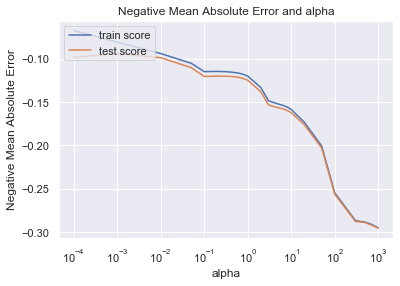

In [286]:
# plotting mean test and train scoes with alpha 
cv_results3['param_alpha'] = cv_results3['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results3['param_alpha'], cv_results3['mean_train_score'])
plt.plot(cv_results3['param_alpha'], cv_results3['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xscale('log') #taking xscle on log for better check of train and test score variations
plt.show()

In [287]:
# final list of alphs 

params3 = {'alpha': [0.00001, 0.00005, 0.00025, 0.00125, 0.00625, 0.03125, 0.15625, 0.78125, 3.90625]}

lasso = Lasso()

# cross validation
model_cv3 = GridSearchCV(estimator = lasso, 
                        param_grid = params3, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv3.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 5e-05, 0.00025, 0.00125, 0.00625,
                                   0.03125, 0.15625, 0.78125, 3.90625]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [288]:
cv_results3 = pd.DataFrame(model_cv3.cv_results_)
cv_results3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.137660,0.016976,0.002271,0.001870,1e-05,{'alpha': 1e-05},-0.108882,-0.093133,-0.101557,-0.083080,...,-0.099831,0.010686,5,-0.060741,-0.061355,-0.061374,-0.062132,-0.062581,-0.061637,0.000646
1,0.139142,0.038994,0.000800,0.001600,5e-05,{'alpha': 5e-05},-0.104783,-0.090480,-0.100415,-0.083078,...,-0.098314,0.010489,4,-0.063946,-0.065713,-0.062764,-0.065749,-0.063955,-0.064425,0.001151
2,0.064244,0.027678,0.000815,0.001631,0.00025,{'alpha': 0.00025},-0.105526,-0.089260,-0.100191,-0.085808,...,-0.095027,0.007150,2,-0.071476,-0.075910,-0.067090,-0.075113,-0.074091,-0.072736,0.003194
3,0.015183,0.003003,0.002403,0.001962,0.00125,{'alpha': 0.00125},-0.096793,-0.092442,-0.097397,-0.092428,...,-0.094993,0.002142,1,-0.083559,-0.086043,-0.073747,-0.085488,-0.086082,-0.082984,0.004709
4,0.010408,0.001964,0.001599,0.001958,0.00625,{'alpha': 0.00625},-0.093985,-0.089049,-0.101186,-0.098984,...,-0.097531,0.005438,3,-0.094097,-0.095003,-0.084191,-0.093422,-0.093492,-0.092041,0.003966


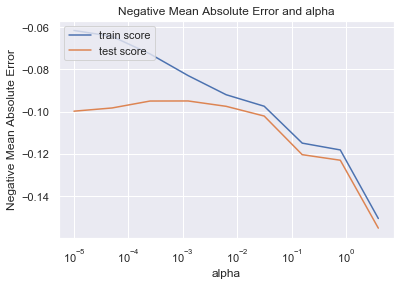

In [289]:
# plotting mean test and train scoes with alpha 
cv_results3['param_alpha'] = cv_results3['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results3['param_alpha'], cv_results3['mean_train_score'])
plt.plot(cv_results3['param_alpha'], cv_results3['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xscale('log') #taking xscle on log for better check of train and test score variation
plt.show()

Mean absolute error with test score is found to be minimum at alpha value 0.00125 and hence this is the optimum value of alpha (or lambda) for Lasso regression now.

In [290]:
# Lasso regression
lm3 = Lasso(alpha=0.00125)
lm3.fit(X_train, y_train)

Lasso(alpha=0.00125, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [291]:
# predict R2 square
y_train_pred = lm3.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm3.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8901444791218175
0.8692500383728887


In [292]:
# Lasso model parameters
model_parameters3 = list(lm3.coef_)
model_parameters3.insert(0, lm3.intercept_)
model_parameters3 = [round(x, 3) for x in model_parameters3]
cols = X.columns
cols = cols.insert(0, "constant")
listL3 = list(zip(cols, model_parameters3))
listL3

[('constant', 24.876),
 ('MSSubClass', -0.001),
 ('LotFrontage', -0.001),
 ('LotArea', 0.0),
 ('OverallQual', 0.074),
 ('OverallCond', 0.049),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.043),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.023),
 ('HalfBath', 0.001),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.014),
 ('TotRmsAbvGrd', 0.01),
 ('Fireplaces', 0.028),
 ('GarageYrBlt', -0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', 0.0),
 ('YrSold', -0.007),
 ('Alley_Grvl', -0.0),
 ('Alley_Pave', 0.0),
 ('PoolQC_Ex', 0.0),
 ('PoolQC_Fa', 0.0),
 ('PoolQC_Gd', -0.106),
 ('Fence_GdPrv', -0.0),
 ('Fence_GdWo', -0.0),
 ('Fence_MnPrv', 0.0),
 ('Fence_MnWw', -0.0),
 ('MiscFeature_Gar2', 0

In [293]:
listL3_1 = pd.DataFrame(listL3) 
listL3_1.columns = ["Variables", "Coefficients"]

In [294]:
listL3_1.loc[(listL3_1['Coefficients']==0), :].count()

Variables       155
Coefficients    155
dtype: int64

Coefficient values for 155 independent variables now have become zero with Lasso regression, which is highest so far.

In [295]:
# Finding variables having coefficients greater than 0.02 (here 0.02 is a hypothetical number) and also for lesser than 0.02 
listL3_1_0 = listL3_1.loc[(listL3_1['Coefficients']>=0.02) | (listL3_1['Coefficients']<=-0.02), :]
listL3_1_0.sort_values(by = 'Coefficients', ascending = False).head(30)

,Variables,Coefficients
0,constant,24.876
4,OverallQual,0.074
85,MSZoning_RL,0.061
199,SaleType_New,0.060
83,MSZoning_FV,0.060
114,Condition1_Norm,0.057
182,KitchenQual_Ex,0.056
5,OverallCond,0.049
145,Exterior1st_BrkFace,0.044
15,BsmtFullBath,0.043


#### End of assignment